In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms

from sklearn.linear_model import LinearRegression as lr

from sklearn.metrics import r2_score

pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

sns.set_style('whitegrid')
sns.set_context('notebook')

import warnings
warnings.simplefilter('ignore')

from IPython.display import clear_output

colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']*5     # Colors to differentiate clusters

# Loading Data

In [3]:
data = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Final Data\\gym_neighborhood_data.csv')

In [4]:
area = data['Km2'].copy()

In [5]:
cols = data.columns.tolist()

# Feature Engineering

In [6]:
data['adult pop'] = data[data.columns.tolist()[23:29]].sum(axis=1)

In [7]:
data['adult_pop/Km2'] = data['adult pop'] / data['Km2']

# Feature Selection: Population

In [8]:
pop = data[['neighborhood', 'adult pop', 'adult_pop/Km2', 'target pop', 'target_pop/Km2', 'Km2']].set_index('neighborhood').copy()

# Data Transformation

In [9]:
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms

In [18]:
pop_log = pop.apply(np.log1p)

pop_ss = ss().fit_transform(pop_log)
pop_mms = mms().fit_transform(pop_log)

#### Two Main Features

In [19]:
pop2 = pop[['target pop', 'adult pop']].copy()

In [20]:
pop_log2 = pop2.apply(np.log1p)

pop_ss2 = ss().fit_transform(pop_log2)
pop_mms2 = mms().fit_transform(pop_log2)

# Mean Shift Clustering

In [699]:
from sklearn.cluster import MeanShift

In [65]:
mean_shift = MeanShift(cluster_all=True)

mean_shift.fit(pop2)
pop['cluster'] = mean_shift.labels_

In [66]:
pop['cluster'].unique()

array([1, 0, 2, 4, 3], dtype=int64)

# K-Means Clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
scrs = []
for n_clusters in range(1,12):
    kmeans = KMeans(n_clusters = n_clusters, n_init=100)
    kmeans.fit(pop_ss2)
    scrs.append([n_clusters, kmeans.inertia_])
    if n_clusters in range(30,2): print(n_clusters)
    
scrs_df = pd.DataFrame(scrs, columns=['n_clusters', 'inertia'])


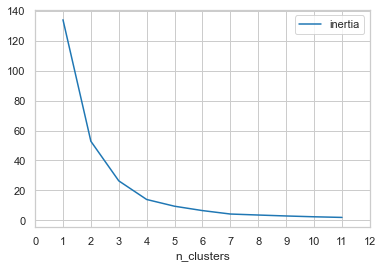

In [16]:
scrs_df.plot(x='n_clusters', y='inertia', xticks=np.linspace(0,12,13))

In [14]:
from sklearn.cluster import KMeans

In [49]:
kmeans = KMeans(n_clusters = 7, n_init=100)
kmeans.fit(pop_ss2)
pop['cluster'] = kmeans.labels_

In [50]:
pop['cluster'].unique(), kmeans.n_iter_

(array([0, 1, 3, 2, 6, 4, 5]), 7)

# Density Based Scan Clustering

In [17]:
from sklearn.cluster import DBSCAN

In [288]:
dbs = DBSCAN(eps=0.08)

dbs.fit(pop_ss2)

pop['cluster'] = dbs.labels_

In [289]:
pop['cluster'].unique()

array([ 4,  0,  3,  1, -1,  2,  5], dtype=int64)

# Cluster Visualization

In [396]:
colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']*5     # Colors to differentiate clusters

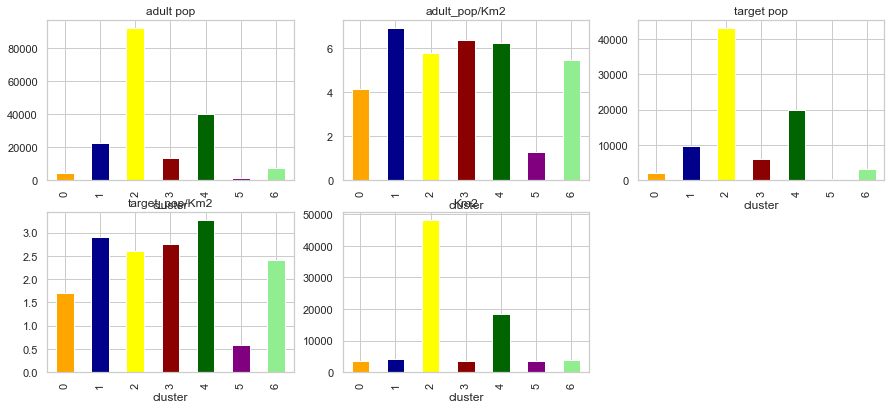

In [52]:
pop_mean = pop.groupby('cluster').mean()

fig = plt.figure(figsize=(15,10))
axes = [fig.add_subplot(3,3,i) for i in range(1, len(pop.columns))]

for i, col in enumerate(pop_mean):
    pop_mean[col].plot(kind='bar', ax=axes[i], title=pop.columns[i], color=[colors[j] for j in range(len(pop['cluster'].unique()))])

### Boxplot

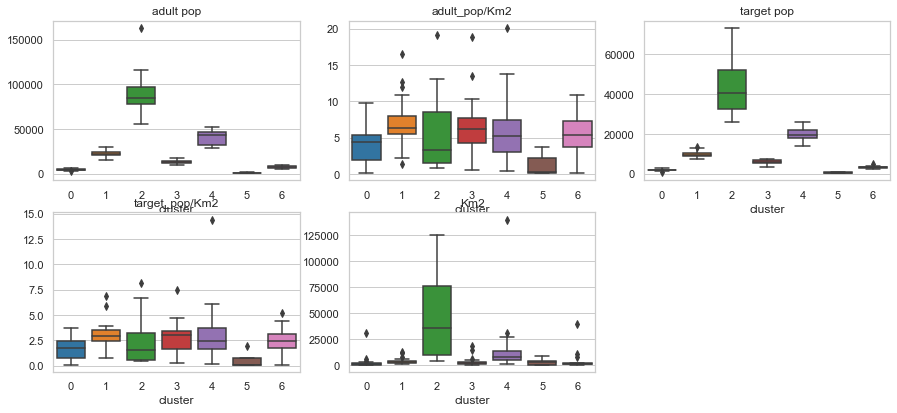

In [53]:
fig = plt.figure(figsize=(15,10))
axes=[fig.add_subplot(3,3,i+1) for i in range(len(pop.columns)-1)]

for i in range(len(pop.columns)-1):
    
    sns.boxplot(data=pop, x='cluster', y=pop.columns[i], ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(pop.columns[i])
    
    #if i==len(income.columns)-3:
     #   axes[i].set_ylim(-10000000,1e9*0.2)
    
    #for j in range(len(pop['cluster'].unique())):
        #axes[i].artists[j].set_facecolor(colors[j])    # Setting colors to match clusters colors.

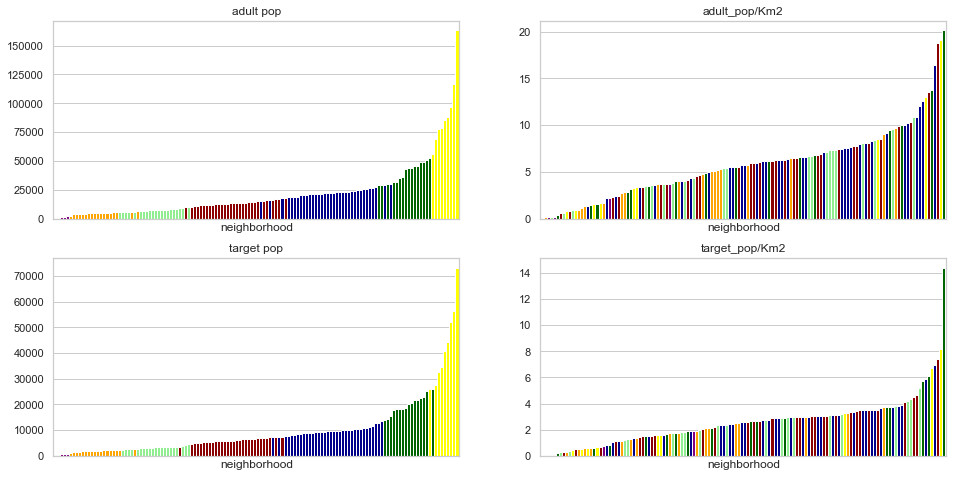

In [54]:
fig = plt.figure(figsize=(16,8))

axes = [fig.add_subplot(2,2,i) for i in range(1,5)]

for i, col in zip(range(4), pop.columns[:-1]):
    
    pop.sort_values(by=col)[col].plot.bar(color=[colors[cluster] for cluster in pop.sort_values(by=col)['cluster']], xticks=[], ax=axes[i], title=col, width=1)

# Relationships

### 3D Scatter Plot

In [55]:
import matplotlib
from IPython.display import clear_output

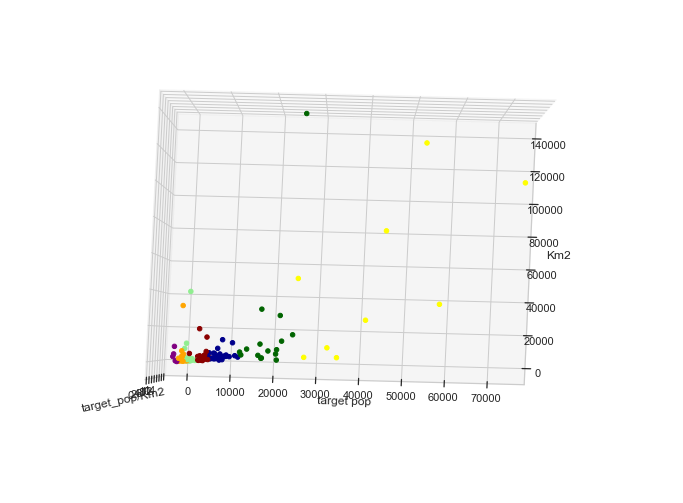

In [56]:
ys = pop['target pop']
xs = pop['Km2']
zs = pop[['target_pop/Km2']]
w = pop['adult_pop/Km2']


for angle in range(1,360,7):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(xs, ys, zs=zs, cmap='RdBu', c=[colors[cluster] for cluster in pop['cluster']], alpha=1)#, s=zss.values/1000,

    ax0.set_ylabel('target pop', fontsize=12)
    ax0.set_xlabel('Km2', fontsize=12)
    ax0.set_zlabel('target_pop/Km2', fontsize=12)


#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    ax0.view_init(angle-90, angle)
    plt.show()
    plt.pause(0.001)
    
    clear_output(wait=True)

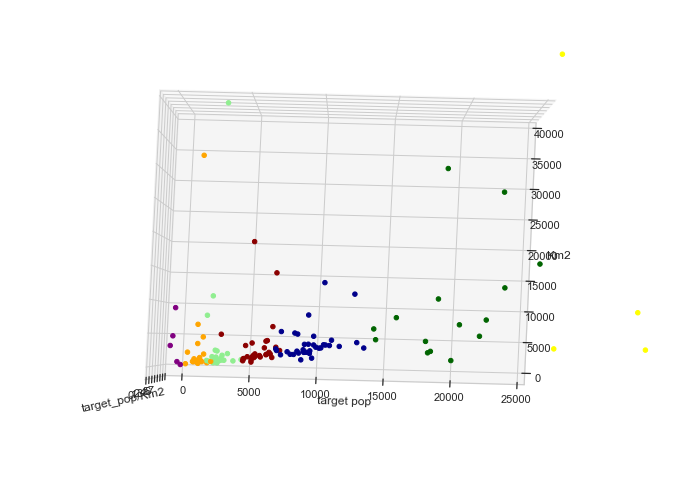

In [58]:
ys = pop['target pop']
xs = pop['Km2']
zs = pop[['target_pop/Km2']]
w = pop['adult_pop/Km2']


for angle in range(1,360,7):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(xs, ys, zs=zs, cmap='RdBu', c=[colors[cluster] for cluster in pop['cluster']], alpha=1)#, s=zss.values/1000,

    ax0.set_ylabel('target pop', fontsize=12)
    ax0.set_xlabel('Km2', fontsize=12)
    ax0.set_zlabel('target_pop/Km2', fontsize=12)


    ax0.set_xlim(-1000, 40000)
    ax0.set_ylim(-700, 25000)
    ax0.set_zlim(-1/5, 7)
    
    ax0.view_init(angle-90, angle)
    plt.show()
    plt.pause(0.001)
    
    clear_output(wait=True)

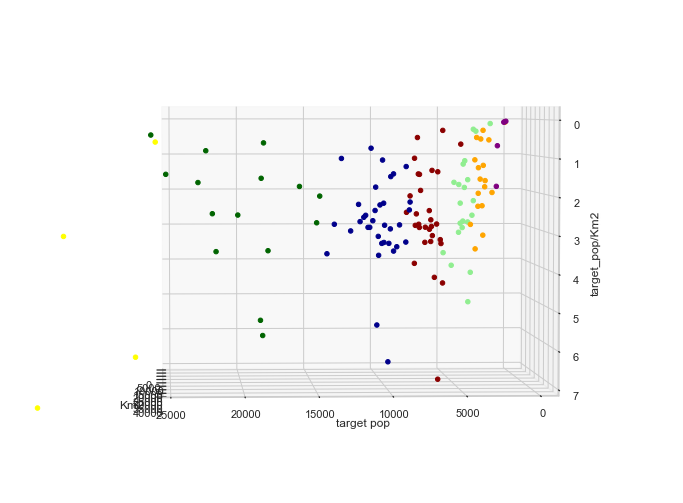

Press Enter for next angle: 190 exit


Completed


In [59]:
ys = pop['target pop']
xs = pop['Km2']
zs = pop[['target_pop/Km2']]
w = pop['adult_pop/Km2']


for angle in range(1,360,7):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(xs, ys, zs=zs, cmap='RdBu', c=[colors[cluster] for cluster in pop['cluster']], alpha=1)#, s=zss.values/1000,

    ax0.set_ylabel('target pop', fontsize=12)
    ax0.set_xlabel('Km2', fontsize=12)
    ax0.set_zlabel('target_pop/Km2', fontsize=12)
    
    ax0.set_xlim(-1000, 40000)
    ax0.set_ylim(-700, 25000)
    ax0.set_zlim(-1/5, 7)
    
    ax0.view_init(angle, angle)
    
    plt.show()
    plt.pause(0.001)
    a=input('Press Enter for next angle: '+str(angle+7))
    if a=='exit': break
        
    clear_output(wait=True)
print('Completed')

### 2D Scatter Plots

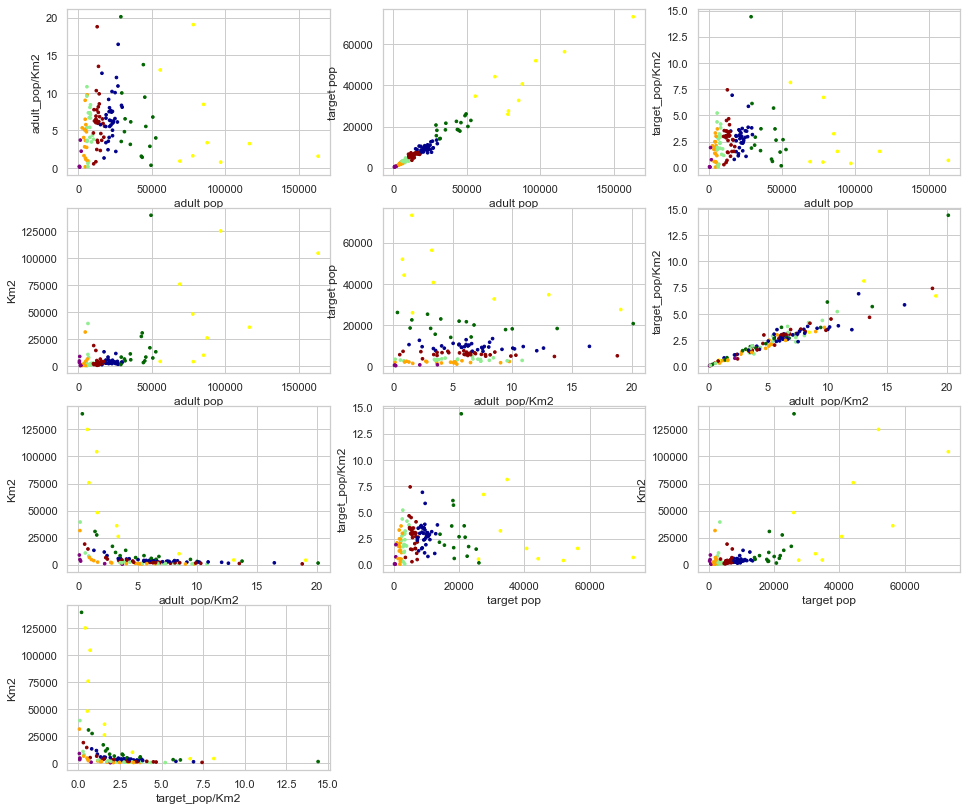

In [61]:
fig = plt.figure(figsize=(16,14))
axes = [fig.add_subplot(4,3,i) for i in range(1,11)]

cnt = 0
for i in range(len(pop.columns)-1):
    for j in range(len(pop.columns)-1):
        
        if i<j:
            axes[cnt].scatter(x=pop[pop.columns[i]], y=pop[pop.columns[j]], c=[colors[cluster] for cluster in pop['cluster']], alpha=1, s=7)
            
            axes[cnt].set_xlabel(pop.columns[i])
            axes[cnt].set_ylabel(pop.columns[j])
            
            cnt+=1
plt.show()

### Zoom

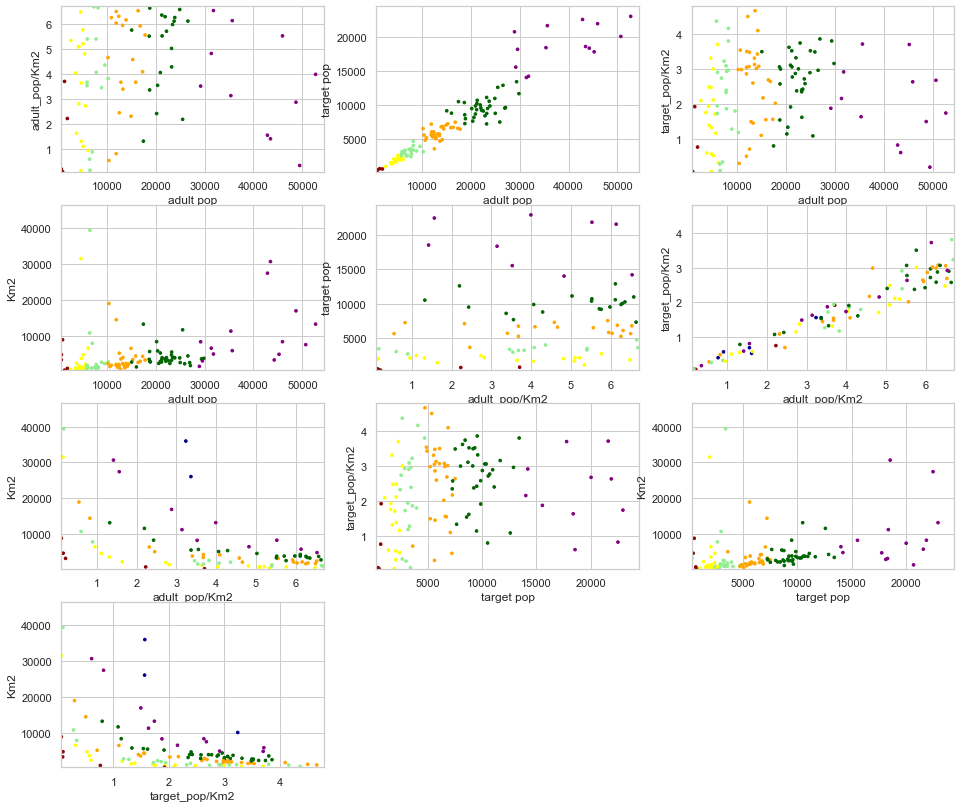

In [762]:
fig = plt.figure(figsize=(16,14))
axes = [fig.add_subplot(4,3,i) for i in range(1,11)]

cnt = 0
for i in range(len(pop.columns)-1):
    for j in range(len(pop.columns)-1):
        
        if i<j:
            axes[cnt].scatter(x=pop[pop.columns[i]], y=pop[pop.columns[j]], c=[colors[cluster] for cluster in pop['cluster']], alpha=1, s=7)
            
            axes[cnt].set_xlabel(pop.columns[i])
            axes[cnt].set_ylabel(pop.columns[j])
            
            axes[cnt].set_xlim(pop[pop.columns[i]].min(), pop[pop.columns[i]].max()/3)
            axes[cnt].set_ylim(pop[pop.columns[j]].min(), pop[pop.columns[j]].max()/3)
            
            cnt+=1
plt.show()

### 2D Scatter Plots for each cluster

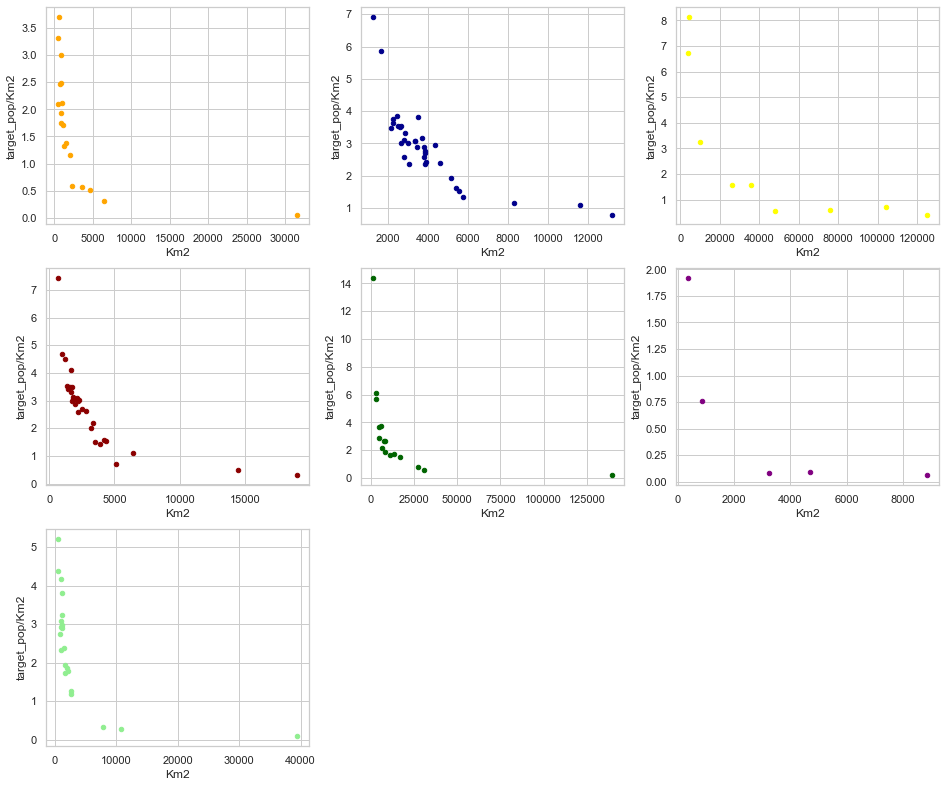

In [62]:
fig = plt.figure(figsize=(16,28))
axes = [fig.add_subplot(6,3,i) for i in range(1,len(pop['cluster'].unique())+1)]

for i, cluster in enumerate(sorted(pop['cluster'].unique())):

    pop[pop['cluster']==cluster].plot.scatter(y='target_pop/Km2', x='Km2', ax=axes[i], color=colors[cluster])
    #sns.regplot(data=pop[pop['cluster']==cluster], y='target pop', x='Km2', ax=axes[i], color=(np.random.random(), np.random.random(), np.random.random()))
    

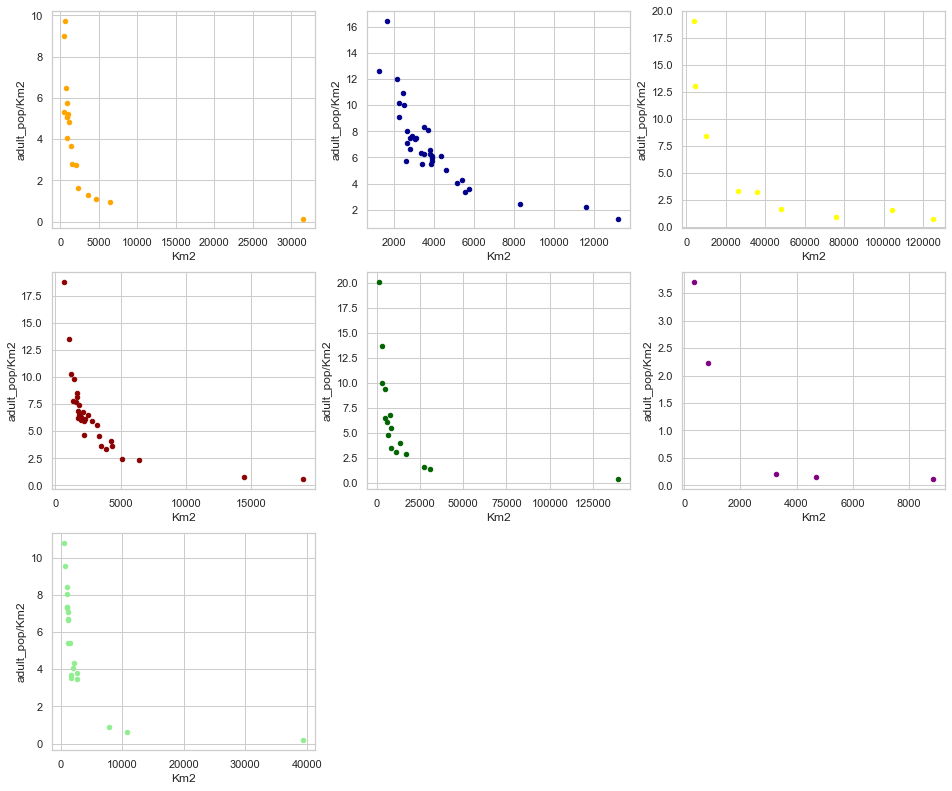

In [63]:
fig = plt.figure(figsize=(16,28))
axes = [fig.add_subplot(6,3,i) for i in range(1,len(pop['cluster'].unique())+1)]

for i, cluster in enumerate(sorted(pop['cluster'].unique())):

    pop[pop['cluster']==cluster].plot.scatter(y='adult_pop/Km2', x='Km2', ax=axes[i], color=colors[cluster])
    #sns.regplot(data=pop[pop['cluster']==cluster], y='target pop', x='Km2', ax=axes[i], color=(np.random.random(), np.random.random(), np.random.random()))
    

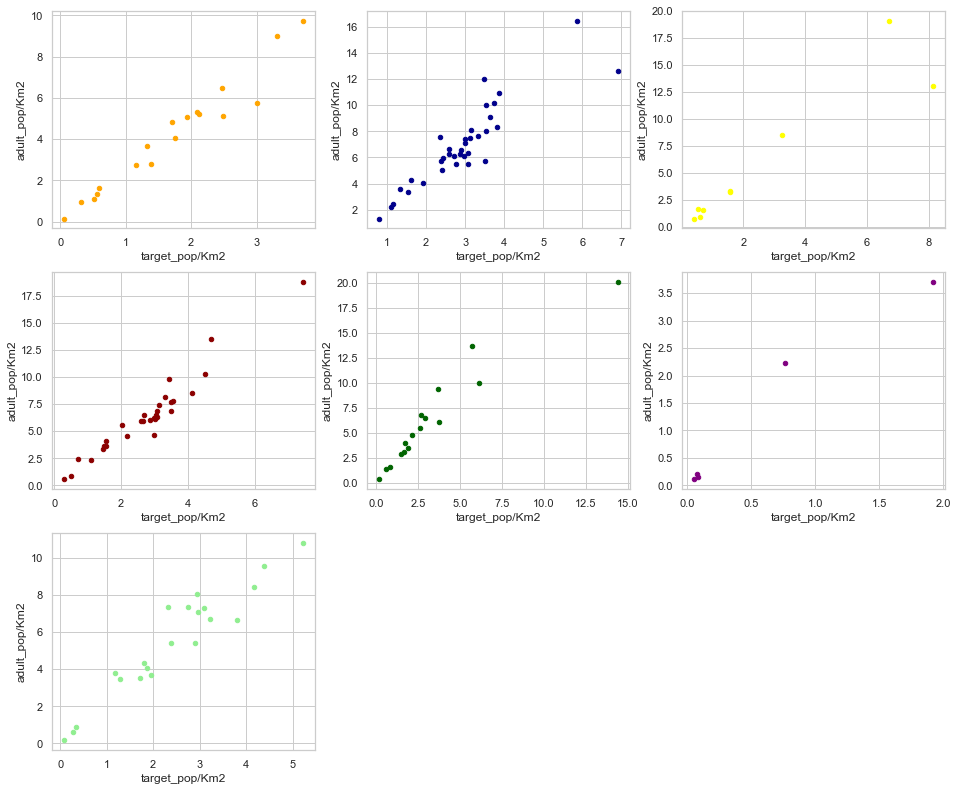

In [64]:
fig = plt.figure(figsize=(16,28))
axes = [fig.add_subplot(6,3,i) for i in range(1,len(pop['cluster'].unique())+1)]

for i, cluster in enumerate(sorted(pop['cluster'].unique())):

    pop[pop['cluster']==cluster].plot.scatter(y='adult_pop/Km2', x='target_pop/Km2', ax=axes[i], color=colors[cluster])
    #sns.regplot(data=pop[pop['cluster']==cluster], y='target pop', x='Km2', ax=axes[i], color=(np.random.random(), np.random.random(), np.random.random()))
    

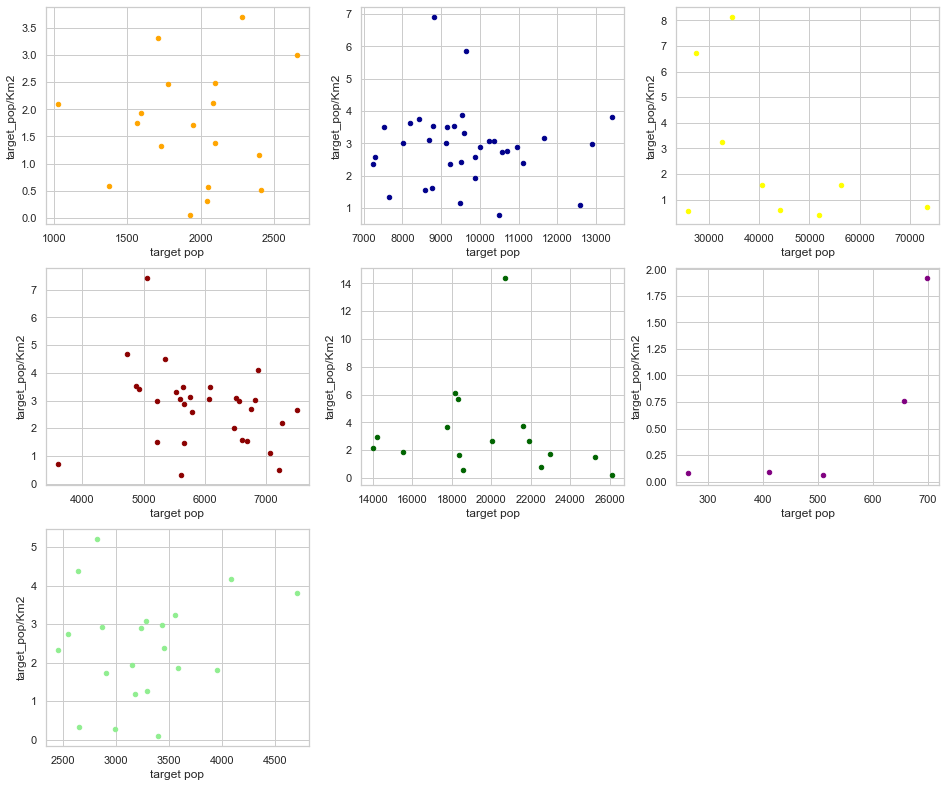

In [65]:
fig = plt.figure(figsize=(16,28))
axes = [fig.add_subplot(6,3,i) for i in range(1,len(pop['cluster'].unique())+1)]

for i, cluster in enumerate(sorted(pop['cluster'].unique())):

    pop[pop['cluster']==cluster].plot.scatter(y='target_pop/Km2', x='target pop', ax=axes[i], color=colors[cluster])
    #sns.regplot(data=pop[pop['cluster']==cluster], y='target pop', x='Km2', ax=axes[i], color=(np.random.random(), np.random.random(), np.random.random()))
    

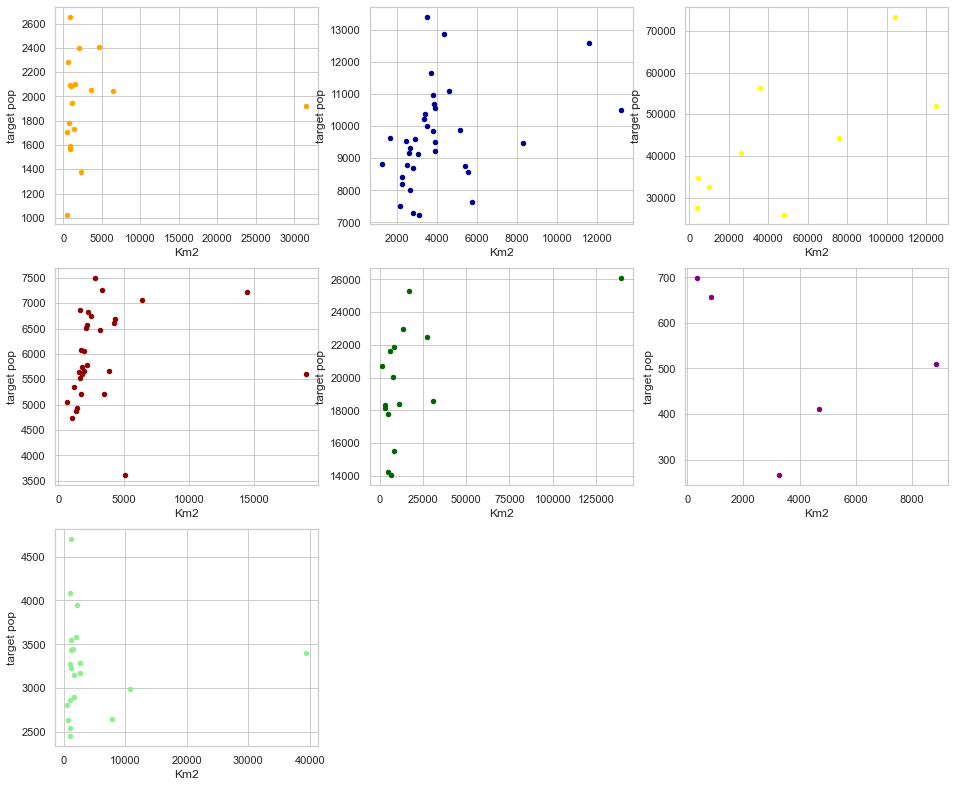

In [66]:
fig = plt.figure(figsize=(16,28))
axes = [fig.add_subplot(6,3,i) for i in range(1,len(pop['cluster'].unique())+1)]

for i, cluster in enumerate(sorted(pop['cluster'].unique())):

    pop[pop['cluster']==cluster].plot.scatter(y='target pop', x='Km2', ax=axes[i], color=colors[cluster])
    #sns.regplot(data=pop[pop['cluster']==cluster], y='target pop', x='Km2', ax=axes[i], color=(np.random.random(), np.random.random(), np.random.random()))
    

# K-Means Clustering Optimization: 2D Y/X Regression 

### Optimization

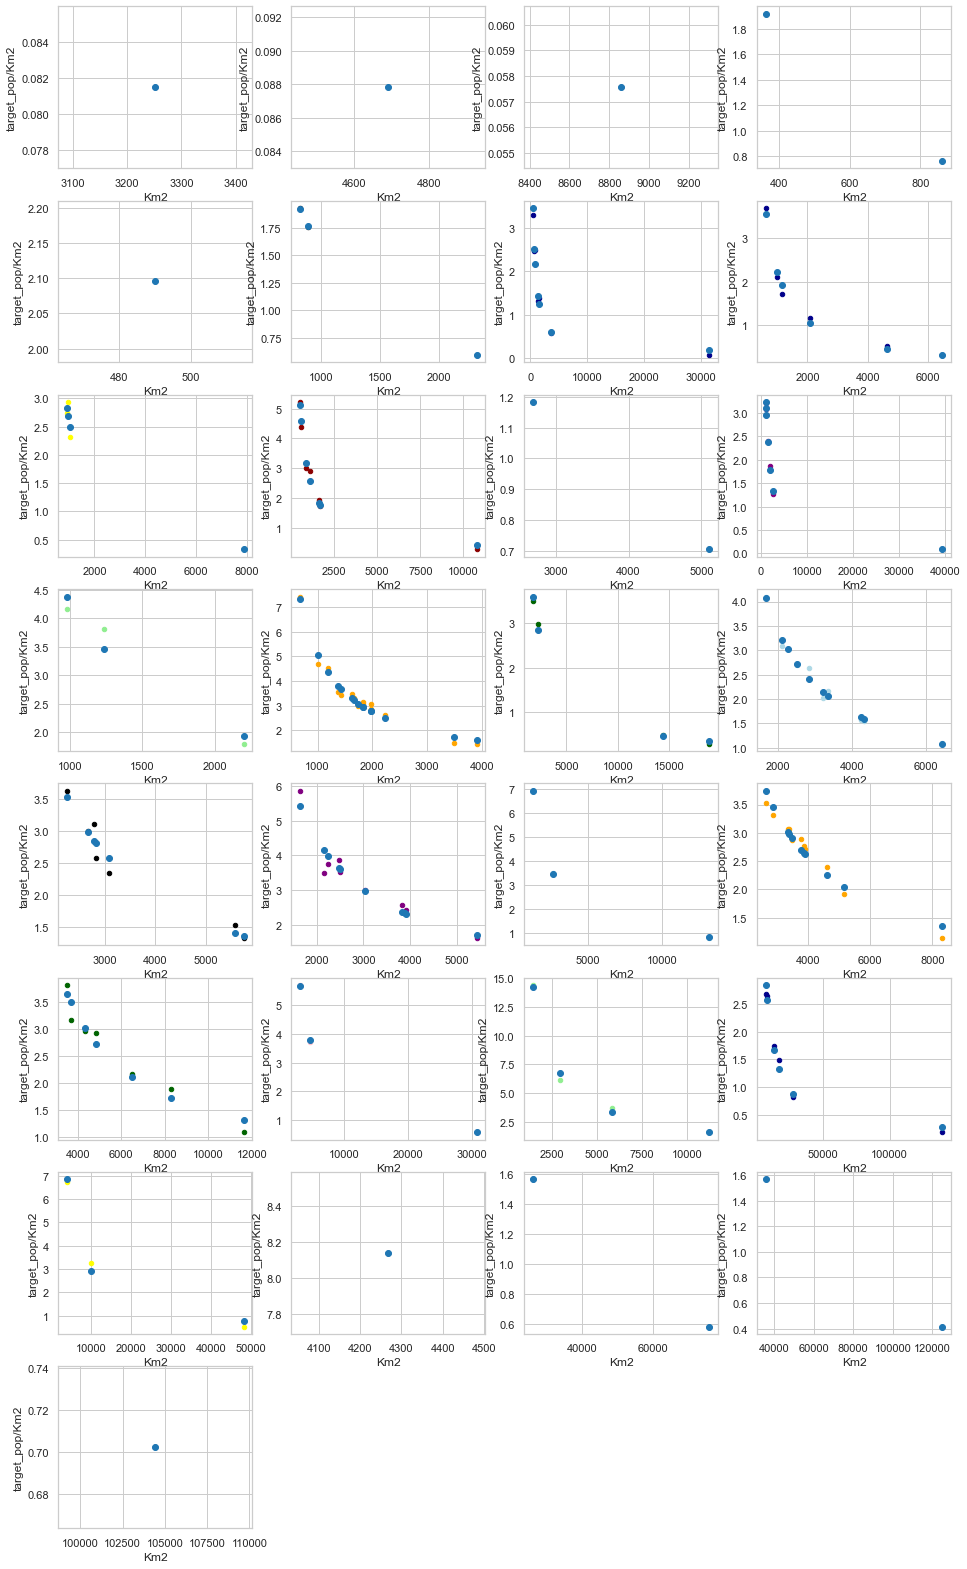

29


In [679]:
scrs = []

#---- Defining Variables ------

ys = pop['target pop']
xs = pop[['Km2']]
zs = pop[['target_pop/Km2']]

#---- Looping ------

for n_clusters in range(1,30):

    kmeans = KMeans(n_clusters = n_clusters, n_init=100)
    kmeans.fit(pop_ss2)
    pop['cluster'] = kmeans.labels_
    
    clusters = pop['cluster']
    sorted_clusters = pop.groupby('cluster').mean()['target pop'].sort_values().index


    a_i, b_i = [], []
    for cluster in sorted_clusters:
        lre = lr().fit(1/xs[clusters==cluster], zs[clusters==cluster])

        a_i.append(lre.coef_[0][0])
        b_i.append(lre.intercept_[0])

    z_pred_i = [a*(1/xs[clusters==cluster])+b for a, b, cluster in zip(a_i, b_i, sorted_clusters)]

#---------------- Counting ---

    sizes = pop.groupby('cluster').count()['target_pop/Km2']
    less_than_3 = sum([size<3 for size in sizes])
   
    less_than_2 = sum([size<2 for size in sizes])
    try: less_than_2_clus = (sorted_clusters.tolist().index(sizes[sizes<2].index[0]) if len(sizes[sizes<2])==1 else [sorted_clusters.tolist().index(sizes[sizes<2].index.values[j]) for j in range(len(sizes[sizes<2]))])
    except: less_than_2_clus = None
    
    
    scrs.append([n_clusters, less_than_3, less_than_2, less_than_2_clus] + [r2_score(zs[clusters==cluster], z_pred_i[i]) for i, cluster in enumerate(sorted_clusters)])     
        
        
    #---- Plotting ----
    
    fig = plt.figure(figsize=(16,28))
    axes = [fig.add_subplot(8,4,i) for i in range(1,len(pop['cluster'].unique())+1)]

    for i, cluster in enumerate(sorted_clusters):

        pop[clusters==cluster].plot.scatter(y='target_pop/Km2', x='Km2', ax=axes[i], color=colors[cluster])
        axes[i].scatter(xs[clusters==cluster], z_pred_i[i].values.ravel())

    plt.show()
    if n_clusters in range(1,50,2): print(n_clusters)
    plt.pause(0.0001)
    if n_clusters in range(1,50,7): 
        if input()=='exit': break
    
    clear_output(wait=True)
    
    
scrs_df = pd.DataFrame(scrs, columns=['n_clusters', '<3', '<2', '<2 clus']+['cluster '+str(i+1) for i in range(n_clusters)])

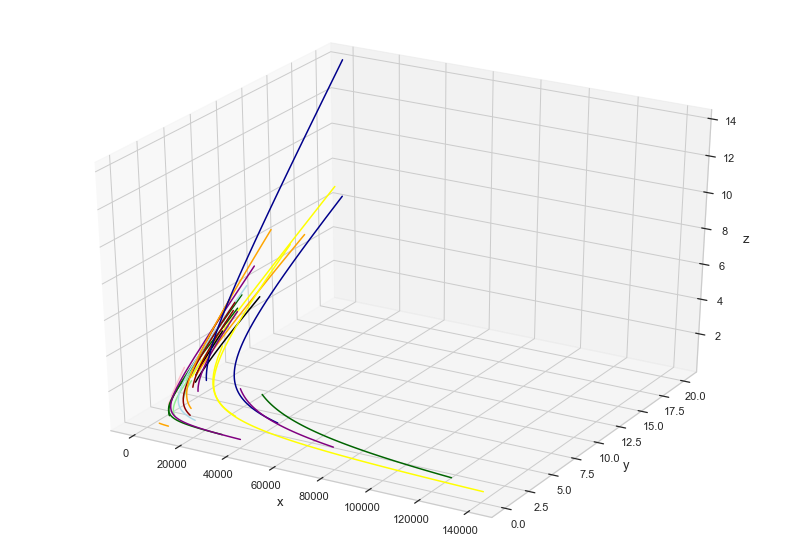

29


In [105]:
scrs_z = []
scrs_y = []
scrs_zy = []

#---- Defining Variables ------

ys = pop[['adult_pop/Km2']]
xs = pop[['Km2']]
zs = pop[['target_pop/Km2']]

mode = input("Choose mode:\n_'single'\n_'multiple'\n_'full'\n_'3d':\n")
if mode not in ['full', '3d']: control = input('"1" ~ target population by Km2.\n"2" ~ adult population by Km2.\n"3" ~ target population by adult population.\n')
else: control = ''
if mode=='3d': scatter=input('Scatter?\n')
#---- Looping ------

for n_clusters in range(1,30):

    kmeans = KMeans(n_clusters = n_clusters, n_init=100)
    kmeans.fit(pop_ss2)
    pop['cluster'] = kmeans.labels_
    
    clusters = pop['cluster']
    sorted_clusters = pop.groupby('cluster').mean()['target pop'].sort_values().index

    x1_i = [np.linspace(xs[clusters==cluster].min(), xs[clusters==cluster].max(), 100) for cluster in sorted_clusters]
    y1_i = [np.linspace(ys[clusters==cluster].min(), ys[clusters==cluster].max(), 100) for cluster in sorted_clusters]
    z1_i = [np.linspace(zs[clusters==cluster].min(), zs[clusters==cluster].max(), 100) for cluster in sorted_clusters]


    a1_i, b1_i = [], []
    a2_i, b2_i = [], []
    a3_i, b3_i = [], []
    for cluster in sorted_clusters:
        lre1 = lr().fit(1/xs[clusters==cluster], zs[clusters==cluster])

        a1_i.append(lre1.coef_[0][0])
        b1_i.append(lre1.intercept_[0])

        lre2 = lr().fit(1/xs[clusters==cluster], ys[clusters==cluster])

        a2_i.append(lre2.coef_[0][0])
        b2_i.append(lre2.intercept_[0])

        lre3 = lr().fit(ys[clusters==cluster], zs[clusters==cluster])

        a3_i.append(lre3.coef_[0][0])
        b3_i.append(lre3.intercept_[0])

    z_pred_i = [a1 * ( 1 / xs[clusters==cluster] ) + b1 for a1, b1, cluster in zip(a1_i, b1_i, sorted_clusters)]
    y_pred_i = [a2 * ( 1 / xs[clusters==cluster] ) + b2 for a2, b2, cluster in zip(a2_i, b2_i, sorted_clusters)]
    zy_pred_i = [a3 * ( ys[clusters==cluster] ) + b3 for a3, b3, cluster in zip(a3_i, b3_i, sorted_clusters)]

    z_pred_i_grid = [a1 * ( 1 / x1 ) + b1 for a1, b1, x1 in zip(a1_i, b1_i, x1_i)]
    y_pred_i_grid = [a2 * ( 1 / x1 ) + b2 for a2, b2, x1 in zip(a2_i, b2_i, x1_i)]
    zy_pred_i_grid = [a3 * ( y1) + b3 for a3, b3, y1 in zip(a3_i, b3_i, y1_i)]

#---------------- Counting ---

    sizes = pop.groupby('cluster').count()['target_pop/Km2']

    less_than_6 = sum([size<6 for size in sizes])
    less_than_5 = sum([size<5 for size in sizes])
    less_than_4 = sum([size<4 for size in sizes])
    less_than_3 = sum([size<3 for size in sizes])
    less_than_2 = sum([size<2 for size in sizes])
    
    try: less_than_2_clus = (sorted_clusters.tolist().index(sizes[sizes<2].index[0]) if len(sizes[sizes<2])==1 else [sorted_clusters.tolist().index(sizes[sizes<2].index.values[j]) for j in range(len(sizes[sizes<2]))])
    except: less_than_2_clus = None
    
    
    scrs_z.append([n_clusters, less_than_6, less_than_5, less_than_4, less_than_3, less_than_2, less_than_2_clus] + [r2_score(zs[clusters==cluster], z_pred_i[i]) for i, cluster in enumerate(sorted_clusters)])     
    scrs_y.append([n_clusters, less_than_6, less_than_5, less_than_4, less_than_3, less_than_2, less_than_2_clus] + [r2_score(ys[clusters==cluster], y_pred_i[i]) for i, cluster in enumerate(sorted_clusters)])     
    scrs_zy.append([n_clusters, less_than_6, less_than_5, less_than_4, less_than_3, less_than_2, less_than_2_clus] + [r2_score(zs[clusters==cluster], zy_pred_i[i]) for i, cluster in enumerate(sorted_clusters)])     
        
        
    #---- Plotting ----
    
    if mode=='multiple': 
        fig = plt.figure(figsize=(16,28))
        axes = [fig.add_subplot(8,4,i) for i in range(1,len(pop['cluster'].unique())+1)]

    elif mode=='single':
        fig = plt.figure(figsize=(16,8))
        ax0 = fig.add_subplot(1,1,1)
    
    elif mode=='full':
        fig = plt.figure(figsize=(20,12))
        axes = [fig.add_subplot(2,2,i) for i in range(1,4)]

    elif mode=='3d':
        fig = plt.figure(figsize=(14,10))
        ax0 = fig.add_subplot(1,1,1, projection='3d')

        ax0.set_xlabel('x', fontsize=13)
        ax0.set_ylabel('y', fontsize=13)
        ax0.set_zlabel('z', fontsize=13)

        
    for i, cluster in enumerate(sorted_clusters):
        
        if mode=='multiple':

            if control=='1':    
                pop[clusters==cluster].plot.scatter(y='target_pop/Km2', x='Km2', ax=axes[i], color=colors[cluster])
                axes[i].scatter(xs[clusters==cluster], z_pred_i[i].values.ravel())
        
            if control=='2':
                pop[clusters==cluster].plot.scatter(y='adult_pop/Km2', x='Km2', ax=axes[i], color=colors[cluster])
                axes[i].scatter(xs[clusters==cluster], y_pred_i[i].values.ravel())                
            
            if control=='3':
                pop[clusters==cluster].plot.scatter(y='target_pop/Km2', x='adult_pop/Km2', ax=axes[i], color=colors[cluster])
                axes[i].scatter(ys[clusters==cluster], zy_pred_i[i].values.ravel())                
                
        elif mode=='single':
            
            if control=='1':    
                pop[clusters==cluster].plot.scatter(y='target_pop/Km2', x='Km2', ax=ax0, color=colors[cluster])
                ax0.plot(x1_i[i], z_pred_i_grid[i].ravel(), color=colors[cluster])
        
            if control=='2':
                pop[clusters==cluster].plot.scatter(y='adult_pop/Km2', x='Km2', ax=ax0, color=colors[cluster])
                ax0.plot(x1_i[i], y_pred_i_grid[i].ravel(), color=colors[cluster])                
            
            if control=='3':
                pop[clusters==cluster].plot.scatter(y='target_pop/Km2', x='adult_pop/Km2', ax=ax0, color=colors[cluster])
                ax0.plot(y1_i[i], zy_pred_i_grid[i].ravel(), color=colors[cluster])                
            
            
        elif mode=='full':
            pop[clusters==cluster].plot.scatter(y='target_pop/Km2', x='Km2', ax=axes[0], color=colors[cluster])
            axes[0].plot(x1_i[i], z_pred_i_grid[i].ravel(), color=colors[cluster])
        
            pop[clusters==cluster].plot.scatter(y='adult_pop/Km2', x='Km2', ax=axes[1], color=colors[cluster])
            axes[1].plot(x1_i[i], y_pred_i_grid[i].ravel(), color=colors[cluster])                
            
            pop[clusters==cluster].plot.scatter(y='target_pop/Km2', x='adult_pop/Km2', ax=axes[2], color=colors[cluster])
            axes[2].plot(y1_i[i], zy_pred_i_grid[i].ravel(), color=colors[cluster])                
            
        elif mode=='3d':
            if scatter=='yes': ax0.scatter(xs[clusters==cluster], ys[clusters==cluster], zs[clusters==cluster], color=colors[cluster])
    
            ax0.plot(x1_i[i].ravel(), y_pred_i_grid[i].ravel(), z_pred_i_grid[i].ravel(), color = colors[clusters.unique()[i]])
            
            
    plt.show()
    print(n_clusters)
    plt.pause(0.0001)
    if n_clusters in range(1,50,15): 
        if input()=='exit': break
    
    clear_output(wait=True)
    
    
scrs_z_df = pd.DataFrame(scrs_z, columns=['n_clusters', '<6', '<5', '<4', '<3', '<2', '<2 clus']+['cluster '+str(i+1) for i in range(n_clusters)])
scrs_y_df = pd.DataFrame(scrs_y, columns=['n_clusters', '<6', '<5', '<4', '<3', '<2', '<2 clus']+['cluster '+str(i+1) for i in range(n_clusters)])
scrs_zy_df = pd.DataFrame(scrs_zy, columns=['n_clusters', '<6', '<5', '<4', '<3', '<2', '<2 clus']+['cluster '+str(i+1) for i in range(n_clusters)])

In [90]:
scrs_dfs = [scrs_z_df, scrs_y_df, scrs_zy_df]
labels = ['zx', 'yx', 'zy']

In [91]:
scr_cols = scrs_dfs[0].columns[7:]
count_cols = scrs_dfs[0].columns[1:7]

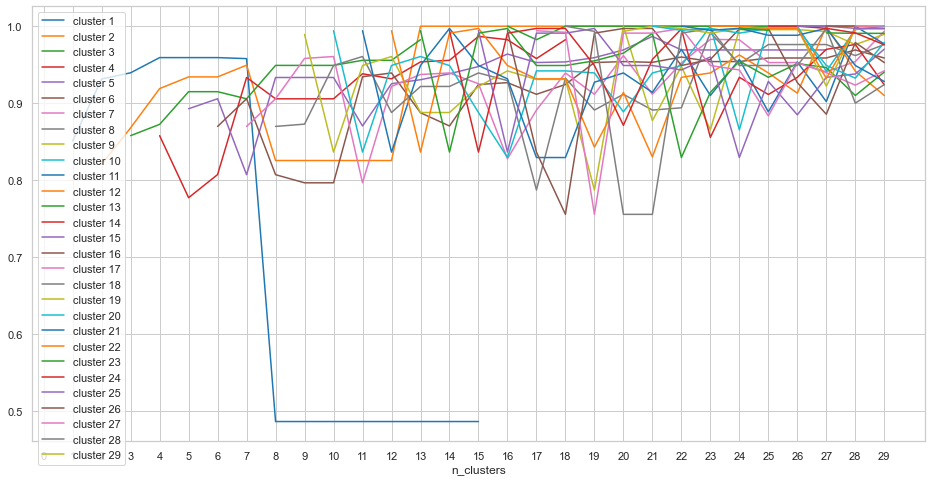

Enter for next:  


In [92]:
for scrs_df in scrs_dfs:
    
    scrs_df.drop(count_cols, axis=1).plot(x='n_clusters', figsize=(16,8), xticks=range(30))
    #plt.legend(loc='right')
    plt.show()

    a = input('Enter for next: ')
    clear_output(wait=True)
    

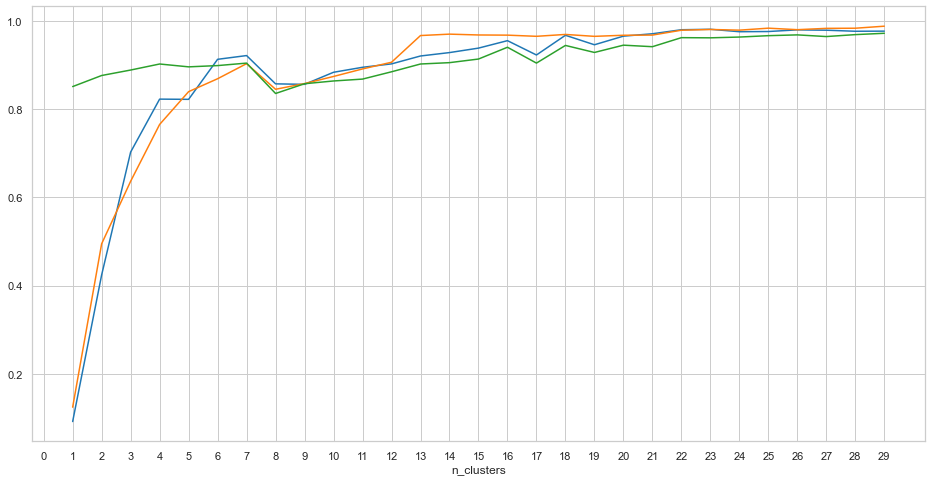

In [93]:
for scrs_df in scrs_dfs:
    
    scrs_df.drop(count_cols, axis=1).set_index('n_clusters').mean(axis=1).plot(x='n_clusters', figsize=(16,8), xticks=range(30))
    #plt.legend(loc='right')
plt.show()
    

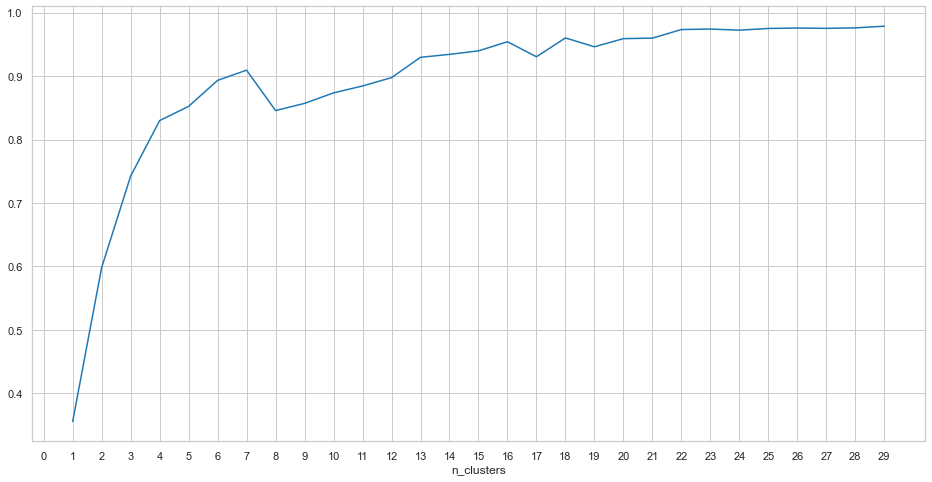

In [94]:

    pd.concat([scrs_df.drop(count_cols, axis=1).set_index('n_clusters').mean(axis=1) for scrs_df in scrs_dfs], axis=1).mean(axis=1).plot(figsize=(16,8), xticks=range(30))

    plt.show()
    

In [44]:
count_cols

Index(['<4', '<3', '<2', '<2 clus'], dtype='object')

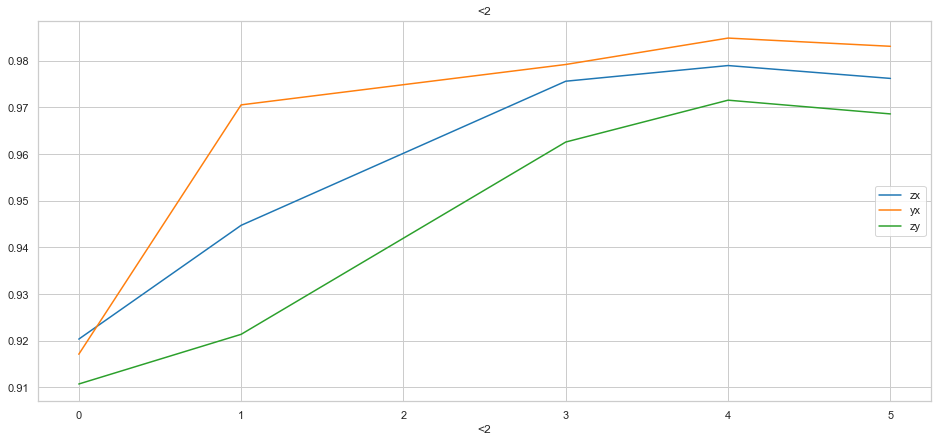

In [95]:
for col in count_cols[:-1]:

    fig, ax0 = plt.subplots(1,1, figsize=(16,7))

    for scrs_df in scrs_dfs:
        
        scrs_df.groupby(col).mean()[scr_cols].mean(axis=1).plot(ax=ax0)
    
    plt.title(col)
    plt.legend(labels, loc='right')
    plt.show()
    plt.pause(0.001)
    if input()=='exit': break
    clear_output(wait=True)

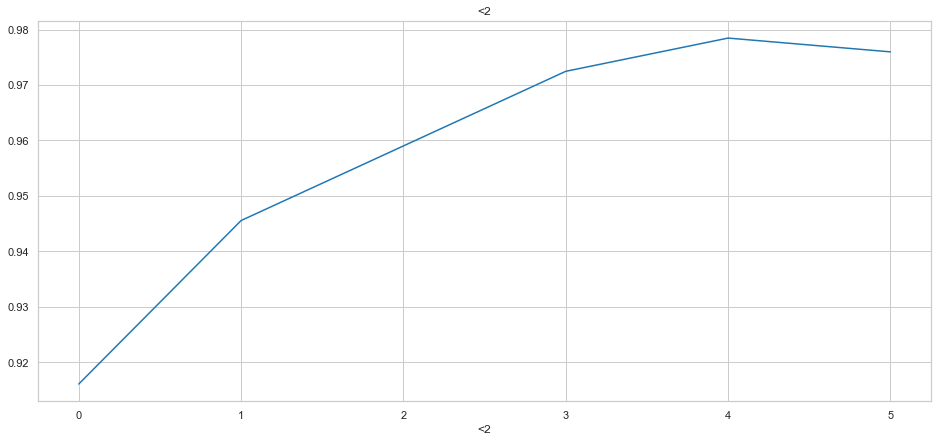

In [96]:
for col in count_cols[:-1]:

    fig, ax0 = plt.subplots(1,1, figsize=(16,7))
    
    pd.concat([scrs_df.groupby(col).mean()[scr_cols].mean(axis=1) for scrs_df in scrs_dfs], axis=1).mean(axis=1).plot(ax=ax0)
    
    plt.title(col)
    #plt.legend(labels, loc='right')
    plt.show()
    plt.pause(0.001)
    if input()=='exit': break
    clear_output(wait=True)

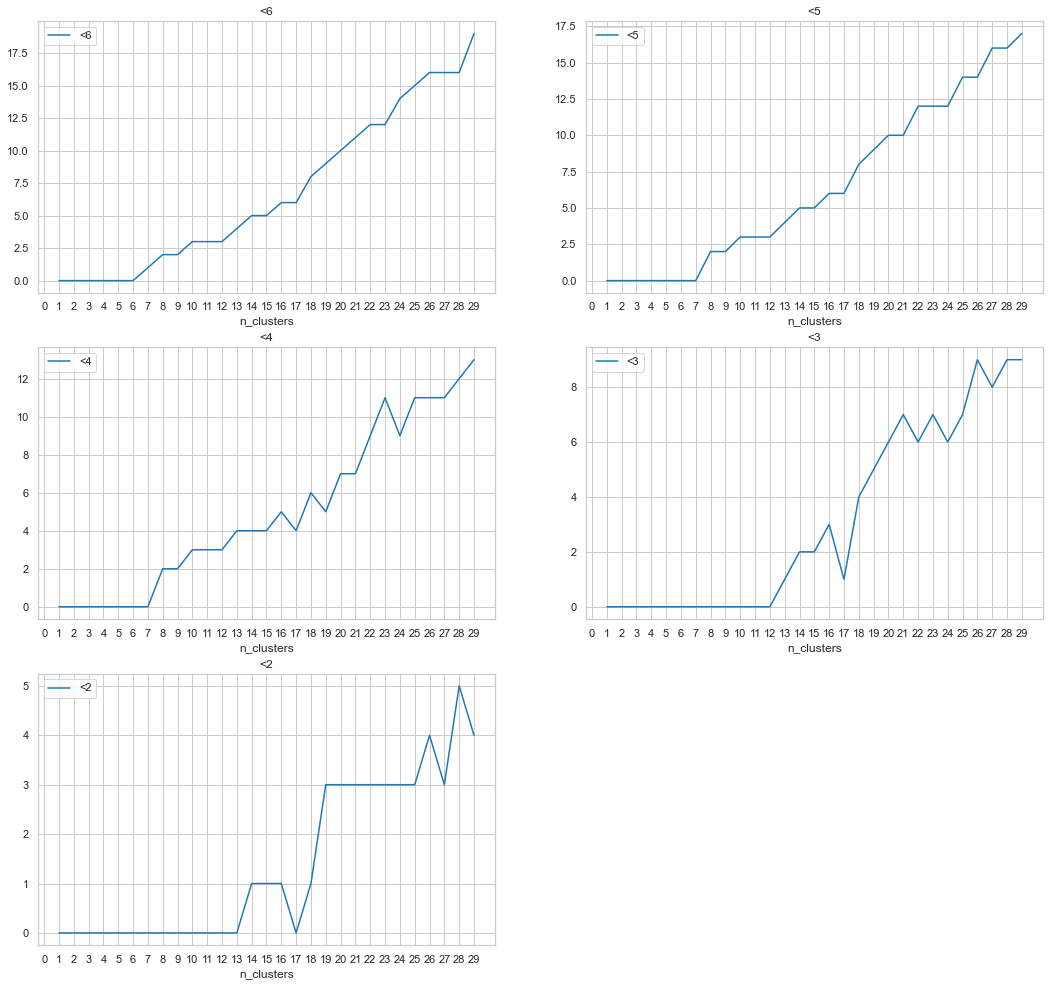

In [103]:
fig = plt.figure(figsize=(18,17))
axes = [fig.add_subplot(3,2,i) for i in range(1,6)]

for i, col in enumerate(count_cols[:-1]):
    
    scrs_dfs[0].plot(x='n_clusters', y=col, ax=axes[i], xticks=range(30))

    axes[i].set_title(col)

plt.show()


In [59]:
scrs_dfs[0]

,n_clusters,<4,<3,<2,<2 clus,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,cluster 11,cluster 12,cluster 13,cluster 14,cluster 15,cluster 16,cluster 17,cluster 18,cluster 19,cluster 20,cluster 21,cluster 22,cluster 23,cluster 24,cluster 25,cluster 26,cluster 27,cluster 28,cluster 29
0,1,0,0,0,[],0.091800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,0,0,[],0.456122,0.391882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,0,0,[],0.500940,0.693354,0.912949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,0,0,[],0.925429,0.736602,0.714754,0.912949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,0,0,[],0.925429,0.801612,0.905723,0.629584,0.847314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0,0,0,[],0.925429,0.801612,0.910995,0.885827,0.979795,0.972260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,0,0,[],0.997276,0.777288,0.881446,0.946684,0.893217,0.979795,0.972260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2,0,0,[],0.579043,0.698158,0.905880,0.881446,0.946684,0.893217,0.979795,0.972260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2,0,0,[],0.579043,0.698158,0.905880,0.881446,0.951151,0.927395,0.959062,0.839941,0.961104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,3,0,0,[],0.579043,0.698158,0.905880,0.881446,0.951151,0.927395,0.966621,0.981904,0.969839,0.971448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Optimized

In [869]:
kmeans = KMeans(n_clusters = 17, n_init=100)
kmeans.fit(pop_ss2)

pop['cluster'] = kmeans.labels_
clusters = pop['cluster']

In [870]:
ys = pop['target pop']
xs = pop[['Km2']]
zs = pop[['target_pop/Km2']]

In [871]:
a_i, b_i = [], []
for cluster in clusters.unique():
    lre = lr().fit(1/xs[clusters==cluster], zs[clusters==cluster])

    a_i.append(lre.coef_[0][0])
    b_i.append(lre.intercept_[0])

z_pred_i = [a*(1/xs[clusters==cluster]) + b for a, b, cluster in zip(a_i, b_i, clusters.unique())]

[r2_score(zs[clusters==cluster], z_pred_i[i]) for i, cluster in enumerate(clusters.unique())]

[0.976068035157168,
 0.9692522422549601,
 0.9489330975288712,
 0.9382166069551651,
 0.9755059789699883,
 0.9714480873235607,
 0.9698386482637906,
 0.9255339224384086,
 0.9126090545595762,
 0.9885030408691688,
 0.5790425077825945,
 0.9814545866327968,
 0.9824122492746415,
 0.9864999725259791,
 0.8567445384795841,
 0.9935936633549732,
 1.0]

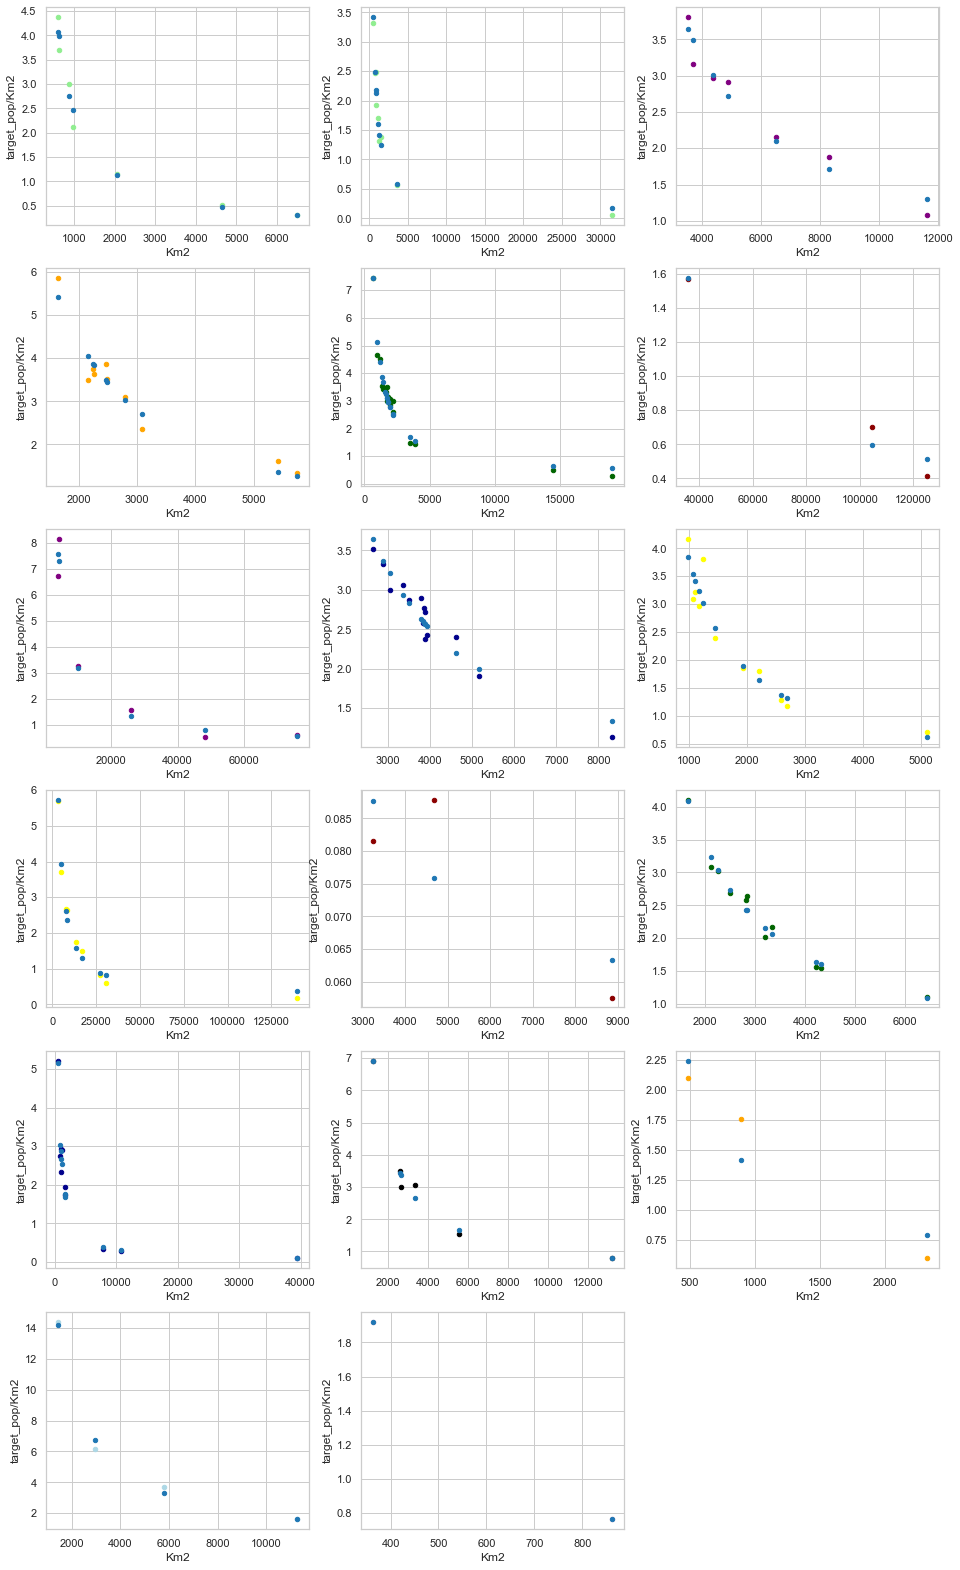

In [872]:
fig = plt.figure(figsize=(16,28))
axes = [fig.add_subplot(6,3,i) for i in range(1,len(pop['cluster'].unique())+1)]

for i, cluster in enumerate(clusters.unique()):

    pop[clusters==cluster].plot.scatter(y='target_pop/Km2', x='Km2', ax=axes[i], color=colors[cluster])
    axes[i].scatter(xs[clusters==cluster], z_pred_i[i].values.ravel(), s=19)
    
    #sns.regplot(data=pop[pop['cluster']==cluster], y='target pop', x='Km2', ax=axes[i], color=(np.random.random(), np.random.random(), np.random.random()))
    

# 3D Surface Plots

In [10]:
z = pop['target_pop/Km2']
#z = z[pop['cluster']!=3]

x_df = pop[['Km2', 'target pop']]#.loc[z.index]

x = pop['Km2']#.loc[z.index]
y = pop[['target pop']]#.loc[z.index]

clusters = pop['cluster']#.loc[z.index]

x_i = [x[clusters==cluster] for cluster in clusters.unique()]
y_i = [y[clusters==cluster] for cluster in clusters.unique()]
z_i = [z[clusters==cluster] for cluster in clusters.unique()]

x_df_i = [x_df[clusters==cluster] for cluster in clusters.unique()]

KeyError: 'cluster'

### General surface plot

In [11]:
x1 = np.linspace(-2,2, 100)
y1 = np.linspace(-2,2, 100)
z1 = y1/x1

xs, ys = np.meshgrid(x1,y1)
zs = np.array([(y_i/x_i) for x_i, y_i in zip(xs, ys)])

### Located surface plot

In [21]:
x1 = np.linspace(x.min(), x.max(), 1000)
y1 = np.linspace(y.iloc[:,0].min(), y.iloc[:,0].max(), 1000)
z1 = y1/x1

xs, ys = np.meshgrid(x1,y1)
zs = np.array([(y_i/x_i) for x_i, y_i in zip(xs, ys)])

(0.0, 30.0)

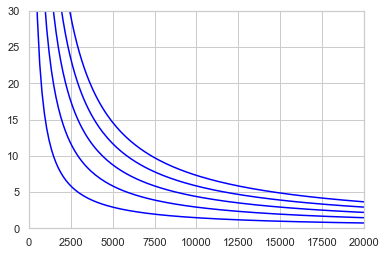

In [23]:
for yp in [(y.max()-y.min())*i/5 for i in range(1,6)]:
    
    plt.plot(x1, yp[0]/x1, color='blue')

plt.xlim(0,20000)
plt.ylim(0,30)

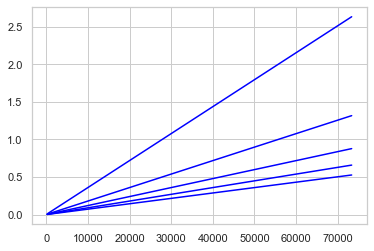

In [28]:
for xp in [(x.max()-x.min())*i/5 for i in range(1,6)]:
    
    plt.plot(y1, y1/xp, color='blue')

#plt.xlim(0,20000)
#plt.ylim(0,30)

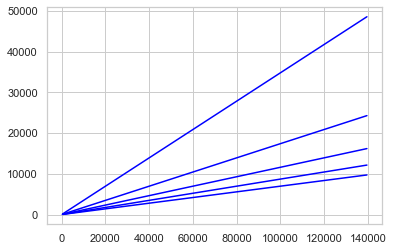

In [26]:
for zp in [(z.max()-z.min())*i/5 for i in range(1,6)]:
    
    plt.plot(x1, x1/zp, color='blue')

#plt.xlim(0,20000)
#plt.ylim(0,30)

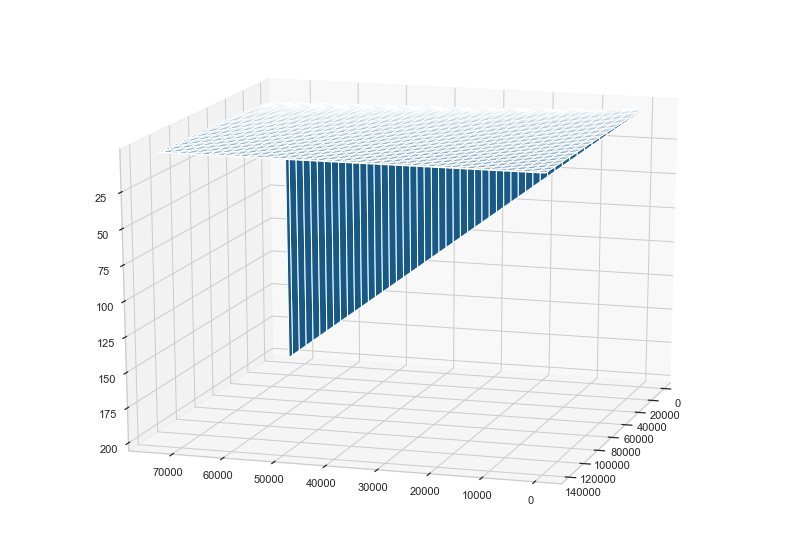

In [133]:
for angle in range(1,360,18):
    
    fig = plt.figure(figsize=(14,10))
#ax0 = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,1,1, projection='3d')



#ax0.scatter(x,z)
    ax1.plot_surface(xs,ys,zs)

    ax1.view_init(angle,angle)

    plt.show()
    plt.pause(0.0001)
    
    clear_output(wait=True)

## Feature Definition

In [874]:
kmeans = KMeans(n_clusters = 17, n_init=100)
kmeans.fit(pop_ss2)
pop['cluster'] = kmeans.labels_

In [875]:
z = pop['target_pop/Km2']
#z = z[pop['cluster']!=3]

x_df = pop[['Km2', 'target pop']]#.loc[z.index]

x = pop['Km2']#.loc[z.index]
y = pop[['target pop']]#.loc[z.index]

clusters = pop['cluster']#.loc[z.index]

x_i = [x[clusters==cluster] for cluster in clusters.unique()]
y_i = [y[clusters==cluster] for cluster in clusters.unique()]
z_i = [z[clusters==cluster] for cluster in clusters.unique()]

x_df_i = [x_df[clusters==cluster] for cluster in clusters.unique()]

### Creating Grid and Calculating z

#### z = y / x

In [876]:
x1 = np.linspace(x.min(), x.max(), len(x))
y1 = np.linspace(y.min(), y.max(), len(y))

xs, ys = np.meshgrid(x1,y1)

zs = np.array([y_i/x_i for x_i, y_i in zip(xs, ys)])

z_pred = y['target pop']/x

In [877]:
r2_score(z, z_pred)

1.0

In [878]:
colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']*5     # Colors to differentiate clusters

In [879]:
from IPython.display import clear_output
import time

### Rotating Four View Points

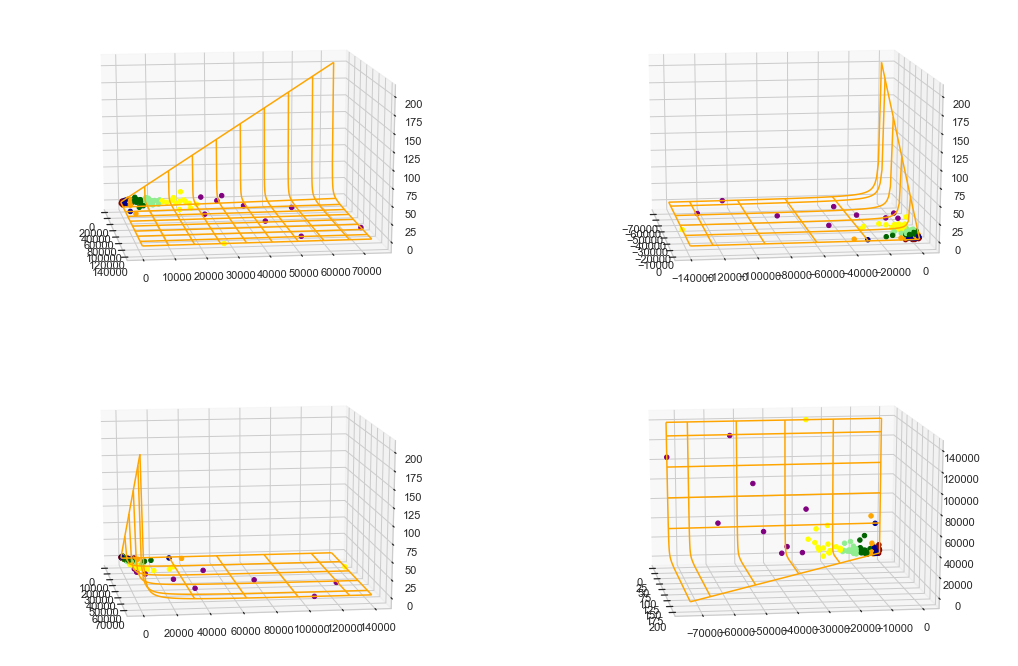

In [781]:
for angle in range(0, 360, 16):    
    
    fig = plt.figure(figsize=(18, 12))
    axes = [fig.add_subplot(2,2,i, projection='3d') for i in range(1,5)]

    axes[0].plot_wireframe(xs, ys, zs, rstride=15, cstride=15, color='orange')
    axes[0].scatter(x, y, z, c=[colors[cluster] for cluster in clusters], alpha=1)

    axes[1].plot_wireframe(-ys, -xs, zs, rstride=30, cstride=30, color='orange')
    axes[1].scatter(-y, -x, z, c=[colors[cluster] for cluster in clusters], alpha=1)

    axes[2].plot_wireframe(ys, xs, zs, rstride=30, cstride=30, color='orange')
    axes[2].scatter(y, x, z, c=[colors[cluster] for cluster in clusters], alpha=1)

    axes[3].plot_wireframe(zs, -ys, xs, rstride=30, cstride=30, color='orange')
    axes[3].scatter(z.values.ravel(), -y, x, c=[colors[cluster] for cluster in clusters], alpha=1)

    axes[0].view_init(15, angle)
    axes[1].view_init(15, angle)
    axes[2].view_init(15, angle)
    axes[3].view_init(15, angle)

    plt.show()  
    plt.pause(0.0001)
    
    clear_output(wait=True)

# Visualizing Using Other Variables

### Feature Definition

In [882]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms
from sklearn.metrics import r2_score

In [880]:
z = pop['target_pop/Km2']
#z = z[pop['cluster']!=3]

x_df = pop[['Km2', 'adult pop']]#.loc[z.index]

x = pop[['Km2']]#.loc[z.index]
y = pop[['adult pop']]#.loc[z.index]

w = pop['target pop']

clusters = pop['cluster']#.loc[z.index]
sorted_clusters = pop.groupby('cluster').mean()['target pop'].sort_values().index

x_i = [x[clusters==cluster] for cluster in clusters.unique()]
y_i = [y[clusters==cluster] for cluster in clusters.unique()]
z_i = [z[clusters==cluster] for cluster in clusters.unique()]

x_df_i = [x_df[clusters==cluster] for cluster in clusters.unique()]

kmeans = KMeans(n_clusters = 17, n_init=100)
kmeans.fit(pop_ss2)
pop['cluster'] = kmeans.labels_

### Fitting

### Calculating predicted z for x and y grid

#### Using Clusters Means

In [802]:
x1 = np.linspace(x.min(), x.max(), len(x))
y1 = np.linspace(y.min(), y.max(), len(y))

xs, ys = np.meshgrid(x1,y1)

zs_i = [np.array([w[clusters==cluster].mean()/x_i for x_i in xs]) for cluster in clusters.unique()]

z_pred_i = [w[clusters==cluster].mean()/x_ii for cluster, x_ii in zip(clusters.unique(), x_i)]

In [803]:
[r2_score(z_ii, z_pred_ii) for z_ii, z_pred_ii in zip(z_i, z_pred_i)]

[0.9033727276220388,
 0.8726013837758041,
 0.9174304352673459,
 0.9023674766112183,
 0.4370909065006997,
 0.8399177679139939,
 0.8562081346439209,
 -2.5182376724331172,
 0.6959105641621433]

#### Using Linear Regression

In [887]:
a_i, b_i = [], []
for cluster in clusters.unique():
    lre = lr().fit(1/x[clusters==cluster], z[clusters==cluster])
    
    #print(lre.coef_)
    #a=input()
    a_i.append(lre.coef_[0])
    b_i.append(lre.intercept_)

x1 = np.linspace(x.min(), x.max(), len(x))
y1 = np.linspace(y.min(), y.max(), len(y))
xs, ys = np.meshgrid(x1,y1)

zs_i = [np.array([(a/x_i)+b for x_i in xs]) for a, b, in zip(a_i, b_i)]

z_pred_i = [a*(1/x[clusters==cluster])+b for a, b, cluster in zip(a_i, b_i, clusters.unique())]        

[r2_score(z_ii, z_pred_ii) for z_ii, z_pred_ii in zip(z_i, z_pred_i)]

    #---- Plotting ----
    
    fig = plt.figure(figsize=(16,28))
    axes = [fig.add_subplot(8,4,i) for i in range(1,len(pop['cluster'].unique())+1)]

    for i, cluster in enumerate(clusters.unique()):

        pop[clusters==cluster].plot.scatter(y='target_pop/Km2', x='Km2', ax=axes[i], color=colors[cluster])
        axes[i].scatter(x[clusters==cluster], z_pred_i[i].values.ravel())

    plt.show()

### Calculating predicted z for smaller x and y grid

x1 = np.linspace(x.min() + (x.max()+x.min())/40, x.max() - (x.max()-x.min())*3/5, len(x))
y1 = np.linspace(y.min(), y.max(), len(y))
xs, ys = np.meshgrid(x1,y1)

zs_i = [np.array([(a/x_i)+b for x_i in xs]) for a, b, in zip(a_i, b_i)]

z_pred_i = [a*(1/x[clusters==cluster])+b for a, b, cluster in zip(a_i, b_i, clusters.unique())]        

In [888]:
[r2_score(z_ii, z_pred_ii) for z_ii, z_pred_ii in zip(z_i, z_pred_i)]

[0.929132797001657,
 0.9489330975288712,
 0.9529060921332428,
 0.9755059789699883,
 0.9714480873235607,
 0.9698386482637906,
 0.9730388566773119,
 0.9126090545595762,
 0.9885030408691688,
 1.0,
 nan,
 0.9341938061914357,
 0.9840001303942195,
 nan,
 0.9935936633549732,
 0.9998064408641998,
 1.0]

### Plotting

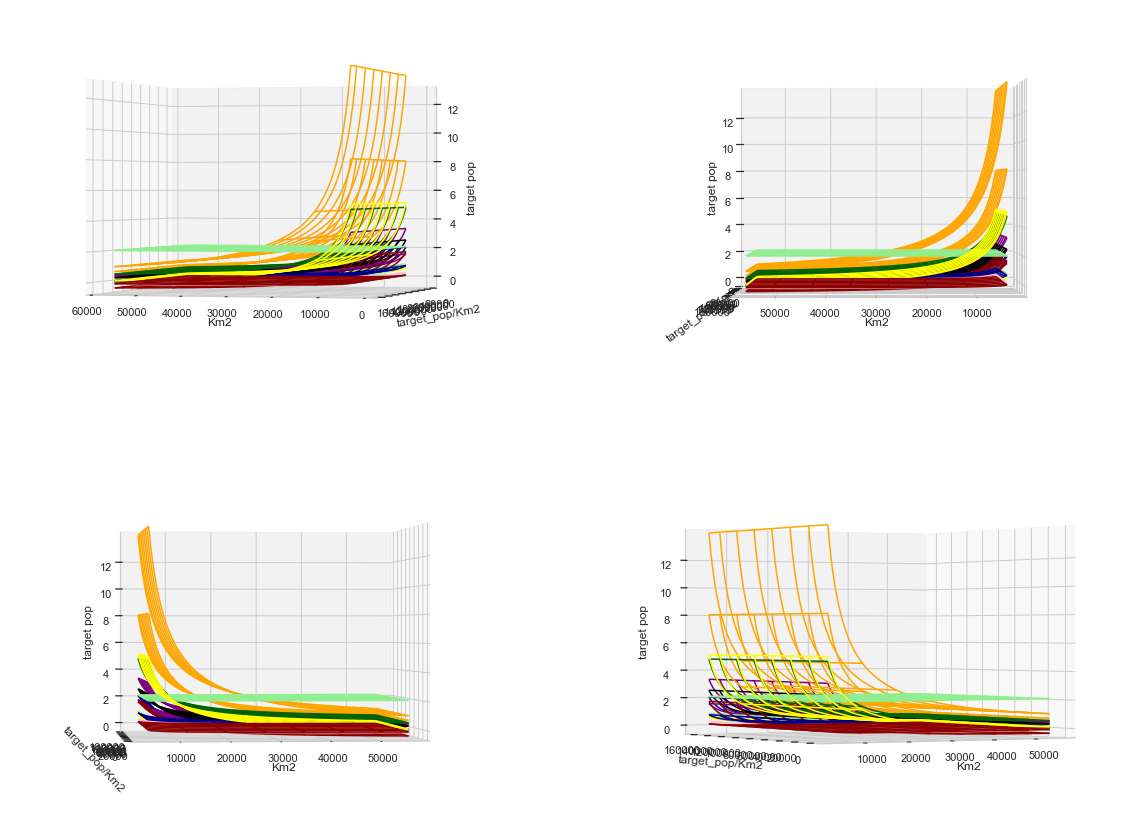

In [890]:
fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(2,2,i, projection='3d') for i in [1,2,3,4]]


for axis, angles in zip([0,1,2,3], [[0,105], [0,90], [0,265], [0,240]]):
    for i, cluster in enumerate(clusters.unique()):
        
        axes[axis].plot_wireframe(xs, ys, zs_i[i], rstride=20, cstride=20, color=colors[cluster], alpha=1)
        #axes[axis].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)
        #rand_color = (np.random.random(), np.random.random(), np.random.random())
        #axes[axis].plot_wireframe(xs, ys, zs_i[i], rstride=30, cstride=30, color=rand_color, alpha=1)
        #axes[axis].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=rand_color, alpha=1)

    axes[0].set_xlim(-1000, 60000)     # No need for limits if scatter plot is marked.
    axes[0].set_ylim(-10000, 170000)
    axes[0].set_zlim(-0.5, 13)    
    
    axes[axis].set_xlabel('Km2', fontsize=12)
    axes[axis].set_ylabel('target_pop/Km2', fontsize=12)
    axes[axis].set_zlabel('target pop', fontsize=12)
        
    axes[axis].view_init(angles[0], angles[1])


### Rotating

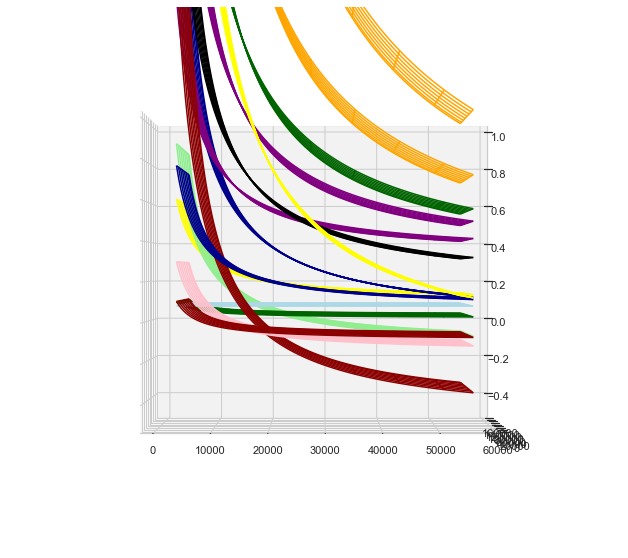

In [891]:
for angle in range(0,271,10):

    fig = plt.figure(figsize=(11, 10))
    axes = [fig.add_subplot(111, projection='3d')]

    for i, cluster in enumerate(clusters.unique()):

        axes[0].plot_wireframe(xs, ys, zs_i[i], rstride=20, cstride=20, color=colors[cluster], alpha=1)
        #axes[0].scatter(x_i[i], y_i[i], z_i[i], c=colors[cluster], alpha=1)
        #axes[0].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)

    axes[0].set_xlim(-1000, 60000)     # No need for limits if scatter plot is marked.
    axes[0].set_ylim(-10000, 170000)
    axes[0].set_zlim(-0.5, 1)    
    
        
    axes[0].view_init(0,angle)
    
    plt.show()
    plt.pause(0.0001)
    clear_output(wait=True)

### Rotating - Zoom: Setting Limits

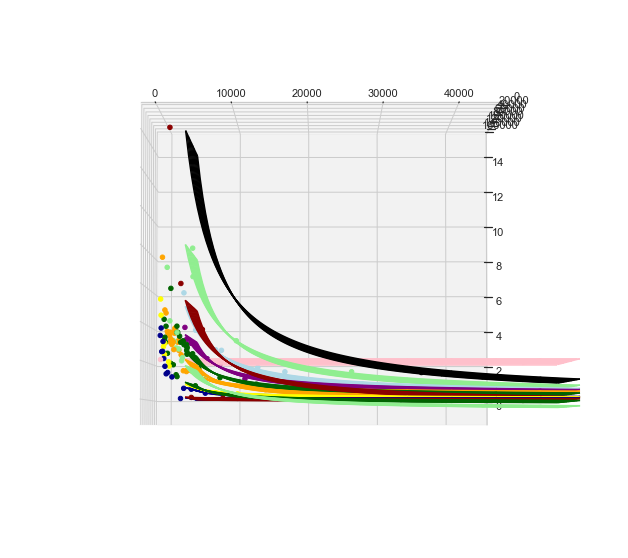

In [892]:
for angle in range(0,361,18):
    
    

    fig = plt.figure(figsize=(11, 10))
    axes = [fig.add_subplot(111, projection='3d')]

    for i, cluster in enumerate(clusters.unique()[2:]):

        axes[0].plot_wireframe(xs, ys, zs_i[i], rstride=15, cstride=15, color=colors[cluster], alpha=1)
        axes[0].scatter(x_i[i], y_i[i], z_i[i], c=colors[cluster], alpha=1)
        #axes[0].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)

    axes[0].set_xlim(-1000, 45000)
    #axes[0].set_ylim(-1000, 30000)
    axes[0].set_zlim(-1, 15)    
    
        
    axes[0].view_init(-3,angle-90)
    
    plt.show()
    plt.pause(0.0001)
    clear_output(wait=True)

### Separate different x, y grid for each cluster

In [893]:
x1_i = [np.linspace(x_ii.min(), x_ii.max(), len(x_ii)) for x_ii in x_i]
y1_i = [np.linspace(y_ii.min(), y_ii.max(), len(y_ii)) for y_ii in y_i]

xys_i = [np.meshgrid(x1,y1) for x1, y1 in zip(x1_i, y1_i)]

#---- MUsing Mean
#zs_i = [np.array([w[clusters==cluster].mean()/x_i for x_i in xys[0]]) for cluster, xys in zip(clusters.unique(), xys_i)]

#---- Using Linear Regression
zs_i = [np.array([(a/x_i)+b for x_i in xys[0]]) for a, b, xys in zip(a_i, b_i, xys_i)]


In [894]:

for i, cluster in enumerate(clusters.unique()):
    
    
    for angle in range(0,360,16):
        
        fig = plt.figure(figsize=(13, 8))
        axes = [fig.add_subplot(111, projection='3d')]
    
        axes[0].plot_wireframe(xys_i[i][0], xys_i[i][1], zs_i[i], rstride=2, cstride=2, color=colors[cluster], alpha=1)
        axes[0].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)

    #axes[0].set_xlim(-1000, 30000)
    #axes[0].set_ylim(-1, 5)
    #axes[0].set_zlim(-10000, 200000)    
    
        
        axes[0].view_init(8,angle)
    
        plt.show()
        plt.pause(0.0001)
        clear_output(wait=True)
    
    control = input('Press Enter to display next cluster. Insert "exit" to leave:')
    if i == len(clusters.unique())-1: break
    if control == 'exit': break

Press Enter to display next cluster. Insert "exit" to leave: exit


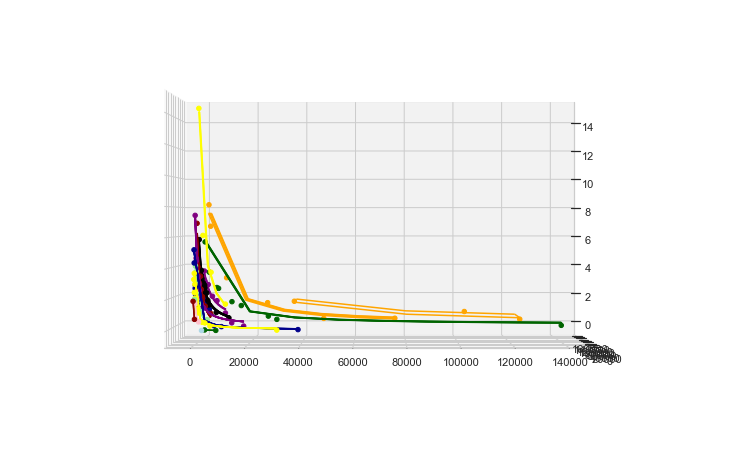

In [895]:
for angle in range(0,271,10):    

    fig = plt.figure(figsize=(13, 8))
    axes = [fig.add_subplot(111, projection='3d')]
    
    for i, cluster in enumerate(clusters.unique()):
    
        

    
        axes[0].plot_wireframe(xys_i[i][0], xys_i[i][1], zs_i[i], rstride=2, cstride=2, color=colors[cluster], alpha=1)
        axes[0].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)

    #axes[0].set_xlim(-1000, 30000)
    #axes[0].set_ylim(-1, 5)
    #axes[0].set_zlim(-10000, 200000)    
    
        
    axes[0].view_init(0,angle)
    
    clear_output(wait=True)
    
    plt.show()
    plt.pause(0.0001)
    #clear_output(wait=True)
    

# 2D Regression Analysis: Target Population in Km2 by Km2 and Adult Population by Km2.

### Feature Definition

In [899]:
kmeans = KMeans(n_clusters = 17, n_init=100)
kmeans.fit(pop_ss2)
pop['cluster'] = kmeans.labels_

### All Clusters

In [900]:
z = pop[['target_pop/Km2']]
#z = z[pop['cluster']!=3]

#x_df = pop[['Km2', 'adult pop']]#.loc[z.index]

x = pop[['Km2']]#.loc[z.index]
y = pop[['adult_pop/Km2']]#.loc[z.index]

w = pop['target pop']

clusters = pop['cluster']#.loc[z.index]

x_i = [x[clusters==cluster] for cluster in clusters.unique()]
y_i = [y[clusters==cluster] for cluster in clusters.unique()]
z_i = [z[clusters==cluster] for cluster in clusters.unique()]

x_df_i = [x_df[clusters==cluster] for cluster in clusters.unique()]

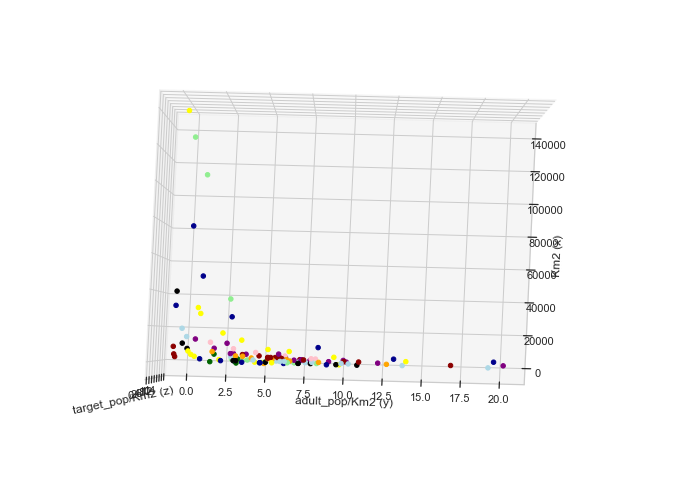

In [901]:
for angle in range(1,360,7):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(x, y, zs=z, cmap='RdBu', c=[colors[cluster] for cluster in pop['cluster']], alpha=1)#, s=zss.values/1000,

    ax0.set_ylabel('adult_pop/Km2 (y)', fontsize=12)
    ax0.set_xlabel('Km2 (x)', fontsize=12)
    ax0.set_zlabel('target_pop/Km2 (z)', fontsize=12)


#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    ax0.view_init(angle-90, angle)
    plt.show()
    plt.pause(0.001)
    
    clear_output(wait=True)

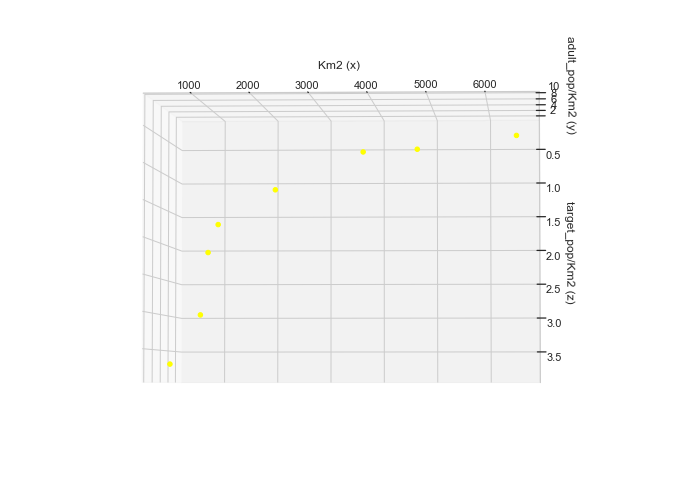

Press Enter for next cluster (12):  exit


In [902]:

for cluster in clusters.unique():
    for angle in range(1,270,7):
    
        fig = plt.figure(figsize=(12,9))
        ax0 = fig.add_subplot(111, projection='3d')

        ax0.scatter(x[clusters==cluster], y[clusters==cluster], zs=z[clusters==cluster], cmap='RdBu', c=colors[cluster], alpha=1)#, s=zss.values/1000,

        ax0.set_ylabel('adult_pop/Km2 (y)', fontsize=12)
        ax0.set_xlabel('Km2 (x)', fontsize=12)
        ax0.set_zlabel('target_pop/Km2 (z)', fontsize=12)

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    
        ax0.view_init(angle-90, angle)
        
        clear_output(wait=True)
        plt.show()
        plt.pause(0.001)
    
    a=input('Press Enter for next cluster ('+str(cluster)+'): ')
    if a == 'exit': break

---
#### Equations:
1. y = a1/x + b1
2. z = a2/x + b2
3. z = a3*y + b3

---
### Parameterization

if x, y, and z are functions of t, then:

dy/dt = (a1/-2)*(1/x²)*(dx/dt)

---
#### Predictions:
x = a2/(z-b2)

1/x = (1/a2)*z + b2/a2

x = a2/(z-b2)
1. y = a1/x + b1
2. 1/x = (1/a2)*z + b2/a2
3. z = a3*y + b3

---
#### (1 and 3):
z = a3*(a1/x + b1) + b3            

7. z = a3*a1*(1/x) + a3*b1 + b3

---
#### (2 and 3):
a3*y + b3 = a2/x + b2

5. y = a2/a3*(1/x) + (b2-b3)/a3 

---
####  (1 and 2):
x = (y-b1)/a1

x = (z-b2)/a2

z = a2/a1 * (y-b1) + b2

7. z = a2/a1*y - a2/a1*b1 + b2

---
8. a3 = a2/a1
9. b3 = - a2/a1*b1 + b2
---

# Fitting: Three Predictors

In [903]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms
from sklearn.metrics import r2_score

# Fitting: One Predictor

In [923]:
lre = lr()

a1_i, a2_i, a3_i = [], [], []
b1_i, b2_i, b3_i = [], [], []

for cluster in clusters.unique():
    
    lre.fit(1/x[clusters==cluster], y[clusters==cluster])

    a1_i.append(lre.coef_[0][0])
    b1_i.append(lre.intercept_[0])

#-------------------------------------------------------------------
    lre.fit(1/x[clusters==cluster], z[clusters==cluster])

    a2_i.append(lre.coef_[0][0])    # 1/a2
    b2_i.append(lre.intercept_[0])  # b2/a2
    
    #lre.fit(z[clusters==cluster], 1/x[clusters==cluster])
    
    #a2_i.append(lre.coef_[0][0])    # 1/a2
    #b2_i.append(lre.intercept_[0])  # b2/a2

#-------------------------------------------------------------------    
    #lre.fit(y[clusters==cluster], z[clusters==cluster])

    #a3_i.append(lre.coef_[0][0])
    #b3_i.append(lre.intercept_[0])

### Predicting

In [641]:
y_pred_i = [(a1_i[i] / x_i[i]) + b1_i[i] for i in range(len(clusters.unique()))]
z_pred_i = [(a2_i[i] / x_i[i]) + b2_i[i] for i in range(len(clusters.unique()))]

#x_pred_i = [1 / ((a2_i[i] * z_i[i]) + b2_i[i]) for i in range(len(clusters.unique()))]

#z_pred_i = [a3_i[i] * y_i[i] + b3_i[i] for i in range(len(clusters.unique()))]

In [409]:
r2_1 = pd.DataFrame([(r2_score(x_i[i], x_pred_i[i]), r2_score(y_i[i], y_pred_i[i]), r2_score(z_i[i], z_pred_i[i])) for i in range(len(clusters.unique()))], index=clusters.unique(), columns=['x', 'y', 'z'])

### Alternate plot style

In [919]:
x1 =[np.linspace(x_ii.min(), x_ii.max(), 100) for x_ii in x_i]
#y1 = [np.linspace(y_ii.min(), y_ii.max(), 100) for y_ii in y_i]
#z1 = [np.linspace(z_ii.min(), z_ii.max(), 100) for z_ii in z_i]

y_pred_i = [(a1_i[i] / x1[i]) + b1_i[i] for i in range(len(clusters.unique()))]
z_pred_i = [(a2_i[i] / x1[i]) + b2_i[i] for i in range(len(clusters.unique()))]

#x_pred_i = [1 / ((a2_i[i] * z1[i]) + b2_i[i]) for i in range(len(clusters.unique()))]
#z_pred_i = [a3_i[i] * y1[i] + b3_i[i] for i in range(len(clusters.unique()))]

### Checking

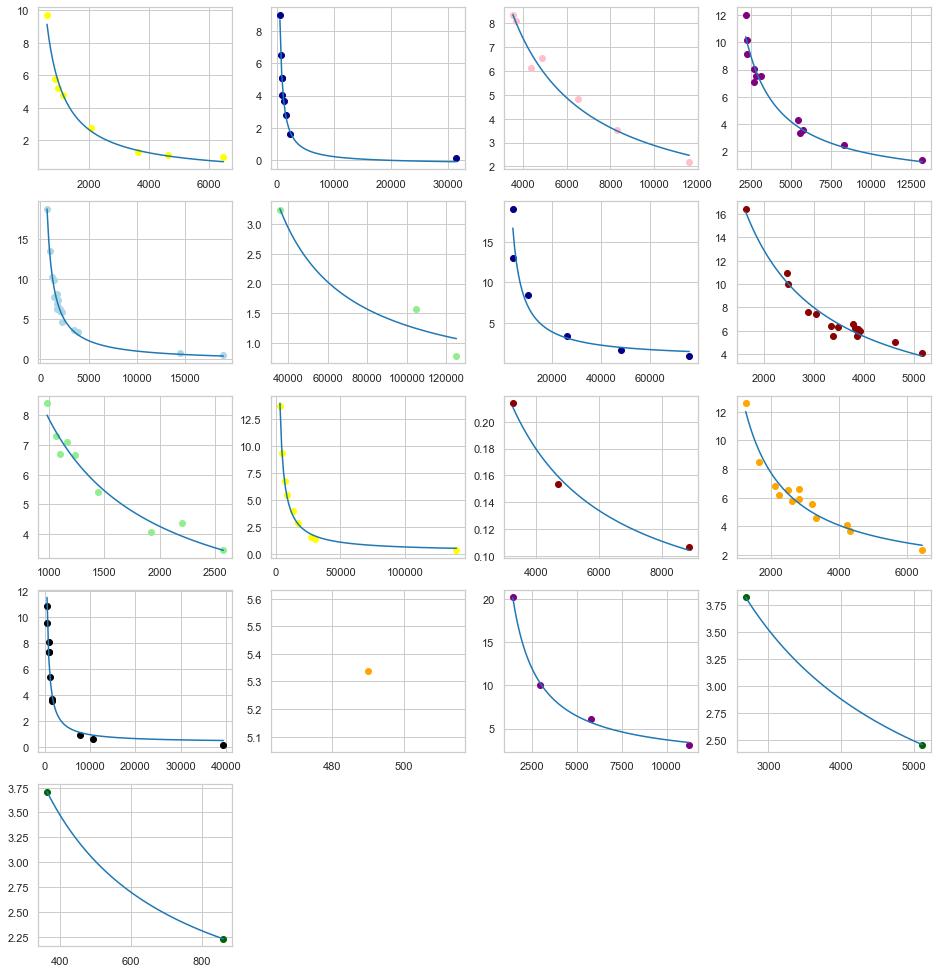

In [920]:
    #---- Plotting ----
    
    fig = plt.figure(figsize=(16,28))
    axes = [fig.add_subplot(8,4,i) for i in range(1,len(pop['cluster'].unique())+1)]

    for i, cluster in enumerate(clusters.unique()):

        #axes[i].scatter(x[clusters==cluster], y[clusters==cluster] , color=colors[cluster])     # Normal alternate on x1, y1, z1
        #axes[i].plot(x1[i], y_pred_i[i])
        
        #axes[i].scatter(y[clusters==cluster], x[clusters==cluster] , color=colors[cluster])    # Inverted alternate on x1, y1, z1
        #axes[i].plot(y1[i], x_pred_i[i])

        #axes[i].scatter(x[clusters==cluster], y[clusters==cluster] , color=colors[cluster])     # Normal predicted on x_i, y_i, z_i
        #axes[i].scatter(x_i[i], y_pred_i[i])

        axes[i].scatter(x[clusters==cluster], y[clusters==cluster] , color=colors[cluster])    # One predictor on x1
        axes[i].plot(x1[i], y_pred_i[i])
        
    plt.show()

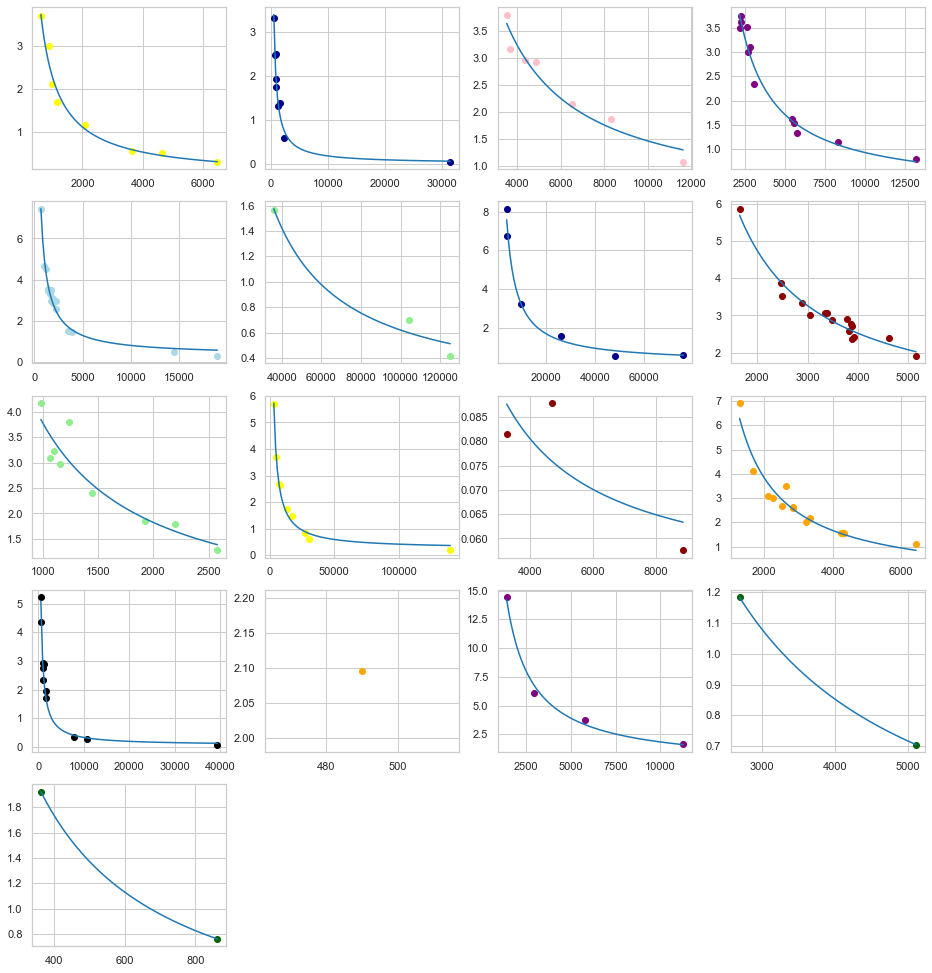

In [921]:
    #---- Plotting ----
    
    fig = plt.figure(figsize=(16,28))
    axes = [fig.add_subplot(8,4,i) for i in range(1,len(pop['cluster'].unique())+1)]

    for i, cluster in enumerate(clusters.unique()):

        #axes[i].scatter(z[clusters==cluster], x[clusters==cluster] , color=colors[cluster])     # Normal alternate on x1, y1, z1
        #axes[i].plot(z1[i], x_pred_i[i])
        
        #axes[i].scatter(x[clusters==cluster], z[clusters==cluster] , color=colors[cluster])    # Inverted alternate on x1, y1, z1
        #axes[i].plot(y1[i], x_pred_i[i])

        #axes[i].scatter(x[clusters==cluster], y[clusters==cluster] , color=colors[cluster])     # Normal predicted on x_i, y_i, z_i
        #axes[i].scatter(x_i[i], y_pred_i[i])

        axes[i].scatter(x[clusters==cluster], z[clusters==cluster] , color=colors[cluster])    # One predictor on x1
        axes[i].plot(x1[i], z_pred_i[i])

        
    plt.show()
        #axes[i].plot(x1[i], z_pred_i[i])

        #axes[i].scatter(z[clusters==cluster], x[clusters==cluster] , color=colors[cluster])     # Normal predicted on x_i, y_i, z_i
        #axes[i].scatter(z_i[i], x_pred_i[i])
        
    plt.show()

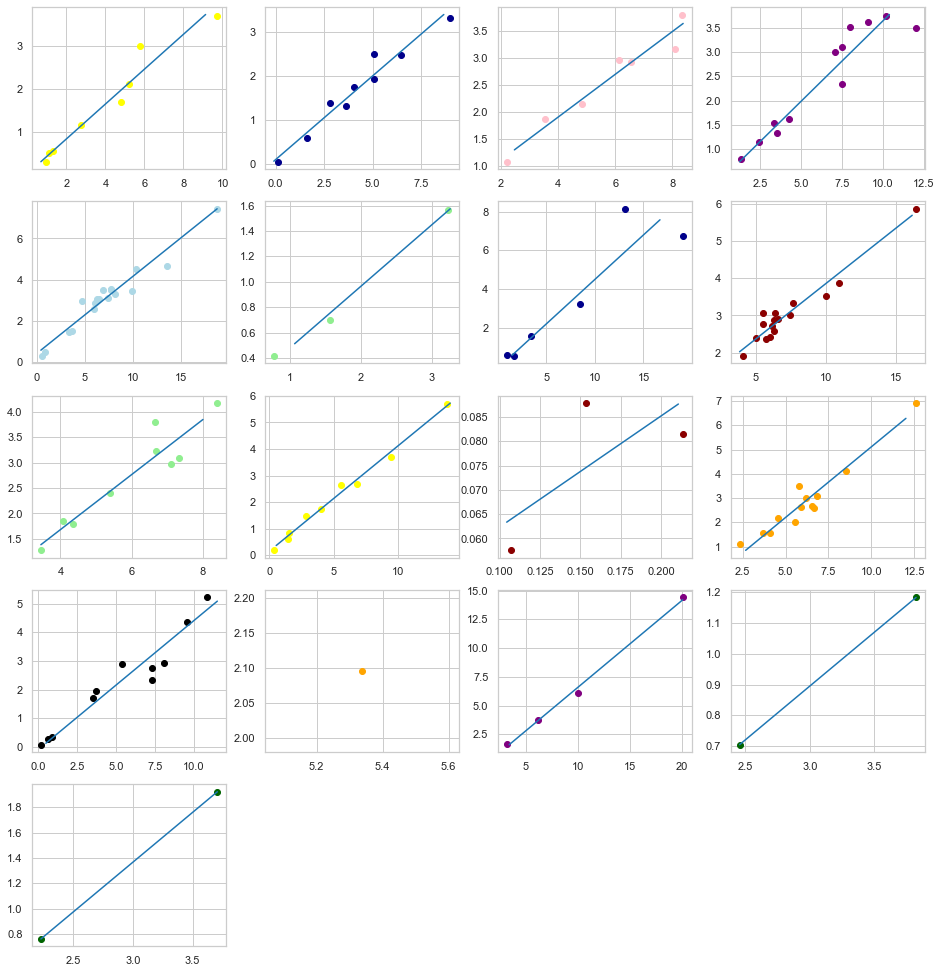

In [922]:
    #---- Plotting ----
    
    fig = plt.figure(figsize=(16,28))
    axes = [fig.add_subplot(8,4,i) for i in range(1,len(pop['cluster'].unique())+1)]

    for i, cluster in enumerate(clusters.unique()):

        #axes[i].scatter(y[clusters==cluster], z[clusters==cluster] , color=colors[cluster])
        #axes[i].plot(y1[i], z_pred_i[i])
        
        #axes[i].scatter(z[clusters==cluster], y[clusters==cluster] , color=colors[cluster])
        #axes[i].plot(z1[i], y_pred_i[i])
        
        #axes[i].scatter(y[clusters==cluster], z[clusters==cluster] , color=colors[cluster])     # Normal predicted on x_i, y_i, z_i
        #axes[i].scatter(y_i[i], z_pred_i[i])
        
        axes[i].scatter(y[clusters==cluster], z[clusters==cluster] , color=colors[cluster])    # One predictor on x1
        axes[i].plot(y_pred_i[i], z_pred_i[i])

    plt.show()

### Visualizing Space Lines Together

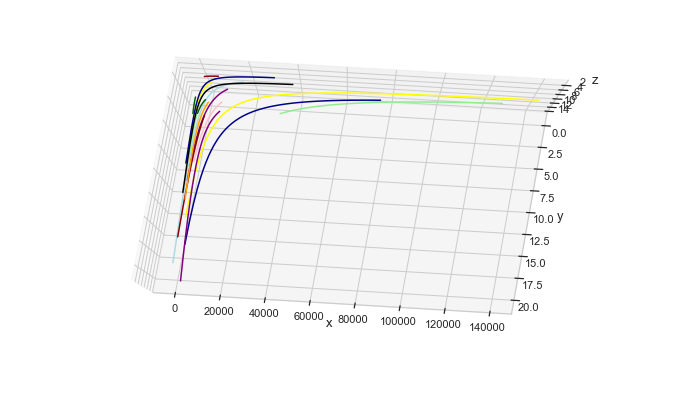

In [928]:
cntt=2
for angle in range(0,271, 8):
    
    fig = plt.figure(figsize=(12,7))
    ax0 = fig.add_subplot(1,1,1, projection='3d')
    
    for i in range(len(clusters.unique())):            

        #ax0.plot(xs=x_pred_i[i].ravel(), ys=y_pred_i[i].ravel(), zs=z_pred_i[i].ravel(), color = colors[clusters.unique()[i]])
        ax0.plot(x1[i].ravel(), y_pred_i[i].ravel(), z_pred_i[i].ravel(), color = colors[clusters.unique()[i]])
        #ax0.scatter(xs=x_i[i], ys=y_i[i], zs=z_i[i], color=colors[clusters.unique()[i]])
    
    #ax0.set_xlim(-5000)
    
    ax0.set_xlabel('x', fontsize=13)
    ax0.set_ylabel('y', fontsize=13)
    ax0.set_zlabel('z', fontsize=13)
    
    ax0.view_init(angle, angle)

    clear_output(wait=True)            
    
    plt.show()
    plt.pause(0.001)
    
    #if input()=='exit': break

    

### Visualizing Space Lines Separately

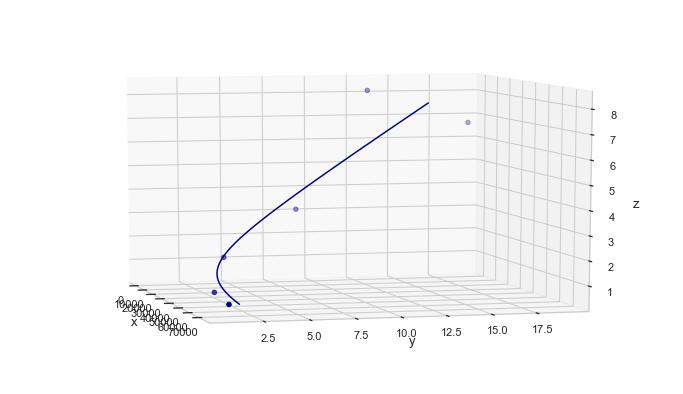

 exit


In [929]:
for i in range(len(clusters.unique())):            

    for angle in range(0,360,15):
        
        fig = plt.figure(figsize=(12,7))
        ax0 = fig.add_subplot(1,1,1, projection='3d')
    
        #ax0.plot(xs=x_pred_i[i].ravel(), ys=y_pred_i[i].ravel(), zs=z_pred_i[i].ravel(), color = colors[clusters.unique()[i]])
        ax0.plot(x1[i].ravel(), y_pred_i[i].ravel(), z_pred_i[i].ravel(), color = colors[clusters.unique()[i]])
        
        #ax0.scatter(x_pred_i[i].values.ravel(), y_i[i].values.ravel(), z_pred_i[i].values.ravel(), color = 'black')    # Normal Predicted on xi, y_i, z_i
        ax0.scatter(x_i[i].values.ravel(), y_i[i].values.ravel(), z_i[i].values.ravel(), color = colors[clusters.unique()[i]])               # Normal Predicted on xi, y_i, z_i (Working to plot line)
        
        #ax0.scatter(xs=x_i[i], ys=y_i[i], zs=z_i[i], color=colors[clusters.unique()[i]])
    
        ax0.set_xlim(-5000)
    
        ax0.set_xlabel('x', fontsize=13)
        ax0.set_ylabel('y', fontsize=13)
        ax0.set_zlabel('z', fontsize=13)
    
        ax0.view_init(8, angle)

        clear_output(wait=True)            
    
        plt.show()
        plt.pause(0.001)
    
    if input()=='exit': break

    

### Visualizing Space Lines Transversally

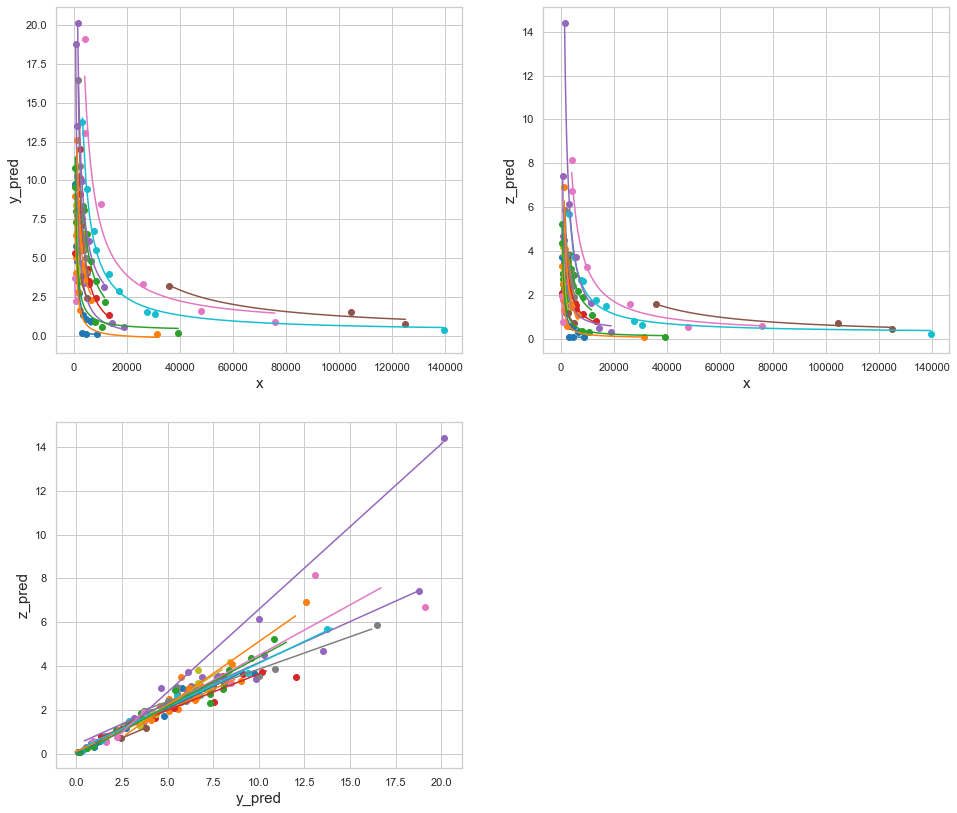

In [930]:
    #---- Plotting ----
    
    fig = plt.figure(figsize=(16,14))
    #axes = [fig.add_subplot(8,4,i) for i in range(1,len(pop['cluster'].unique())+1)]
    axes = [fig.add_subplot(2,2,i) for i in range(1,4)]
    
    for i, cluster in enumerate(clusters.unique()):

        axes[0].plot(x1[i], y_pred_i[i])
        axes[1].plot(x1[i], z_pred_i[i])
        axes[2].plot(y_pred_i[i], z_pred_i[i])

        axes[0].scatter(x_i[i], y_i[i])
        axes[1].scatter(x_i[i], z_i[i])
        axes[2].scatter(y_i[i], z_i[i])
        

    axes[0].set_xlabel('x', fontsize=15)
    axes[0].set_ylabel('y_pred', fontsize=15)
    axes[1].set_xlabel('x', fontsize=15)
    axes[1].set_ylabel('z_pred', fontsize=15)
    axes[2].set_xlabel('y_pred', fontsize=15)
    axes[2].set_ylabel('z_pred', fontsize=15)
    
    plt.show()

# gyms

In [117]:
data['gym/adult_pop'] = data['gyms'] / data['adult pop'] * 10000

In [118]:
gym_features = ['gyms', 'gym/Km2', 'gym/target_pop', 'target pop', 'Km2']

In [119]:
gyms = data[gym_features].copy()

In [120]:
gyms_log = gyms.apply(np.log1p)

gyms_ss = ss().fit_transform(gyms_log)
gyms_mms = mms().fit_transform(gyms_log)

gyms_ss = pd.DataFrame(gyms_ss, index=gyms.index, columns=gyms.columns)
gyms_mms = pd.DataFrame(gyms_mms, index=gyms.index, columns=gyms.columns)

In [184]:
X = (gyms_log['gyms']**2/(gyms_log['Km2'])).to_frame()

In [185]:
kmeans = KMeans(n_clusters=12, max_iter=100)

kmeans.fit(X)

gyms['cluster'] = kmeans.labels_

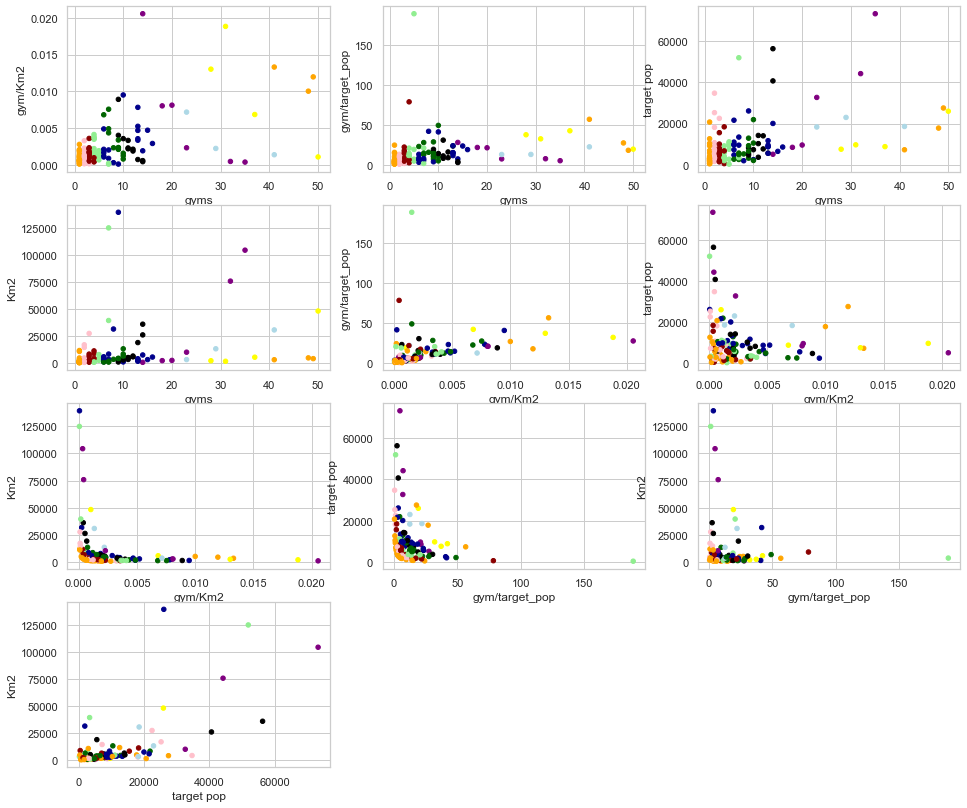

In [186]:
fig = plt.figure(figsize=(16,14))
axes = [fig.add_subplot(4,3,i) for i in range(1,11)]
cnt=0

for i in range(5):
    for j in range(5):
        if i<j:
            gyms.plot.scatter(gym_features[i], gym_features[j], ax=axes[cnt], color=[colors[cluster] for cluster in gyms['cluster']])
            cnt+=1
plt.show()

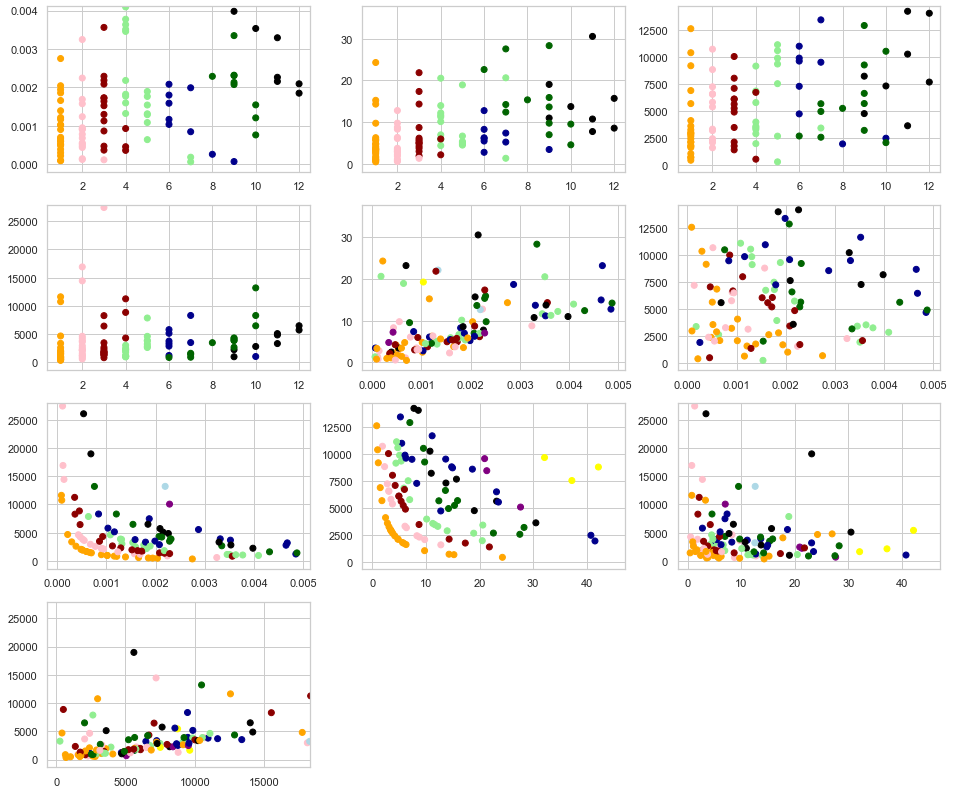

In [187]:
fig = plt.figure(figsize=(16,14))
axes = [fig.add_subplot(4,3,i) for i in range(1,11)]
cnt=0

for i in range(5):
    for j in range(5):
        if i<j:
            
            x_plot = gyms[gym_features[i]]
            y_plot = gyms[gym_features[j]]
            
            axes[cnt].scatter(x_plot, y_plot, color=[colors[cluster] for cluster in gyms['cluster']])
            
            axes[cnt].set_xlim(x_plot.min()-(x_plot.max()-x_plot.min())/80, x_plot.max()/4)
            axes[cnt].set_ylim(y_plot.min()-(y_plot.max()-y_plot.min())/80, y_plot.max()/5)
            cnt+=1
            
            
plt.show()